#Building a Hybrid Recommender System for Spotify Tracks Using Content-Based and Collaborative Filtering

## Author


*  Sri Poojitha Mandali - 001560891




## Abstract
This notebook outlines the procedure for constructing a recommendation system for Spotify tracks using a hybrid approach that combines content-based and collaborative filtering techniques applied to a Spotify dataset. Content-based filtering suggests tracks that align with a user's preferences by leveraging intrinsic attributes of the tracks themselves, such as danceability, energy, and genre. Collaborative filtering, on the other hand, utilizes track popularity to recommend songs based on user interaction patterns. The process begins with data preprocessing, which includes cleansing and feature selection. Subsequently, we employ cosine similarity to gauge the likeness between tracks based on their attributes and Neural Collaborative Filtering (NCF) to model user interactions through track popularity. Ultimately, these methods are used to generate personalized track recommendations for users based on both their listening history and track popularity. This notebook offers a step-by-step walkthrough with code snippets, visualizations, and explanations, providing a comprehensive guide to building a recommendation system for Spotify tracks using real-world data.


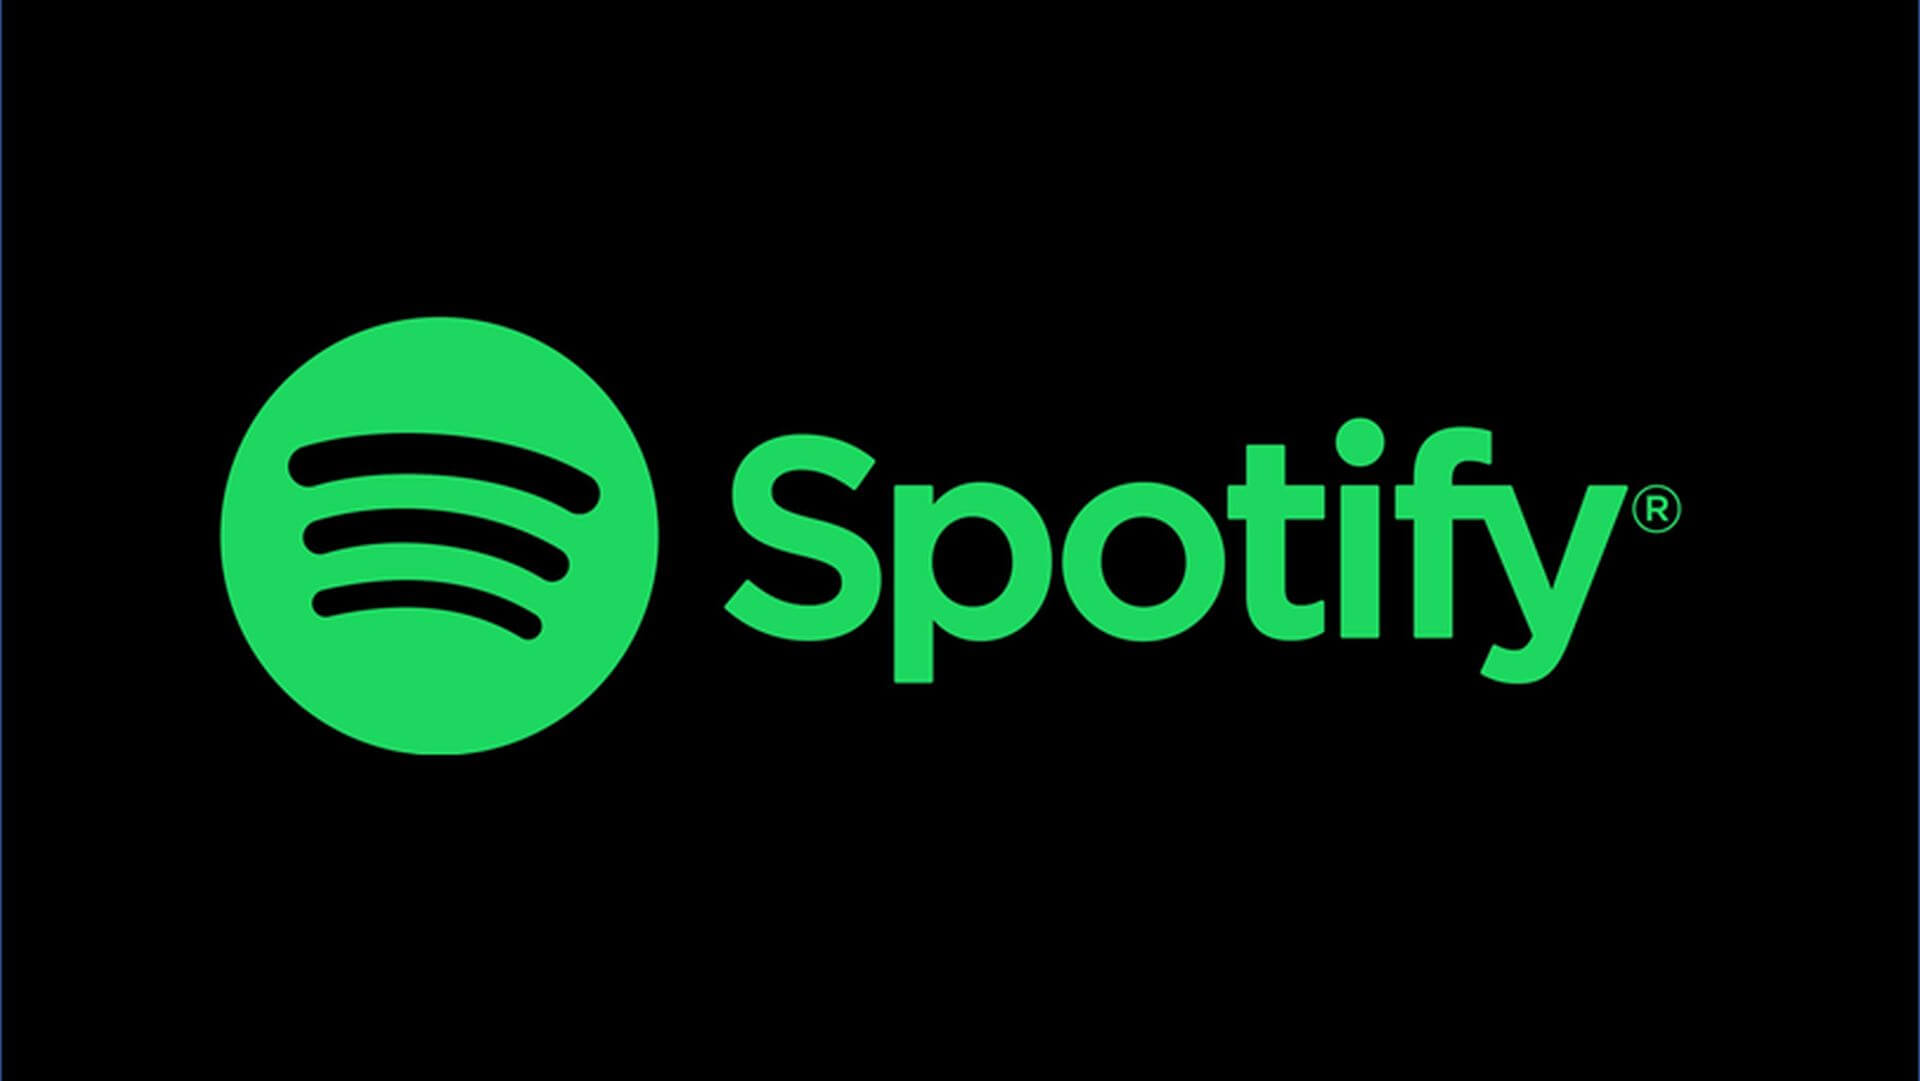

##### Link to Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

## Theory and Background

##Recommendation System

Recommender systems are pivotal in offering personalized content to users across various industries, including e-commerce, media streaming, and social networks. These systems help users discover relevant items such as movies, music, products, or even social media content by predicting their preferences based on historical data or item attributes. The two primary techniques used to implement recommender systems are collaborative filtering and content-based filtering. However, each approach has its own limitations, leading to the adoption of hybrid recommender systems that combine the strengths of both.

1. **Collaborative Filtering:**
Collaborative filtering works by identifying patterns of user interactions with items. The fundamental assumption behind this method is that users who have interacted with similar items in the past will exhibit similar preferences in the future. Collaborative filtering can be divided into two main categories:

- **User-based collaborative filtering:** This technique finds users with similar interaction histories and recommends items that similar users have liked or rated highly. For example, if User A and User B have similar listening habits, the system might recommend songs that User B liked to User A.
- **Item-based collaborative filtering:** This technique focuses on finding similarities between items based on the users who have interacted with them. For instance, if several users have listened to Track X and Track Y, and a new user listens to Track X, the system might recommend Track Y based on this shared interaction.

Collaborative filtering is powerful because it doesn't require any knowledge of the items themselves—only the interaction history. Techniques like matrix factorization (e.g., singular value decomposition, or SVD) and neighborhood-based methods (like the Nearest Neighbors algorithm) are commonly used. However, one of the biggest challenges with collaborative filtering is the cold start problem, which arises when there is insufficient interaction data for new users or new items. This limits the system's ability to make recommendations in the absence of historical user data.

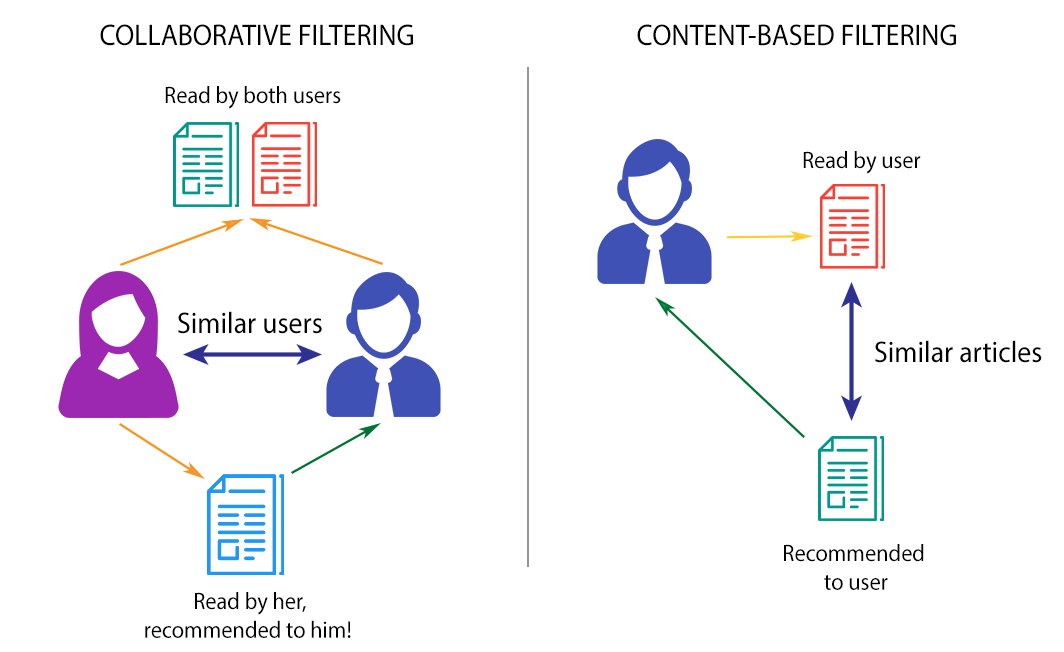

2. **Content-Based Filtering:**
Content-based filtering works by recommending items that are similar to those a user has interacted with based on the intrinsic properties of the items. In the context of music recommendation systems, content-based filtering analyzes characteristics of tracks, such as:

- `Danceability`: How suitable the track is for dancing, based on factors like tempo and rhythm stability.
- `Energy`: The intensity or activity level of the track, where fast, loud, and noisy tracks are considered highly energetic.
- `Acousticness`: A measure of how likely a track is acoustic, with higher values indicating more acoustic tracks.
- `Tempo`: The speed of the track, measured in beats per minute (BPM).

Content-based filtering offers a personalized experience by analyzing the features of items a user has liked in the past and suggesting similar items. The technique is particularly useful when there is limited user interaction data. However, content-based systems are often limited by the scope of the user's historical interactions, leading to a lack of diversity in recommendations, as the system may only suggest items similar to what the user has already encountered.

3. **Hybrid Recommender Systems:**
Hybrid recommender systems aim to overcome the limitations of both collaborative filtering and content-based filtering by combining them into a unified approach. A hybrid system typically operates by:

- **Generating recommendations using both methods:** The system independently produces recommendations using collaborative filtering and content-based filtering.
- **Merging the results:** The results from both methods are combined, usually by assigning weights to each recommendation to calculate a final hybrid score. The weight (e.g., alpha) allows control over how much influence each method has on the final recommendation. For example, a higher weight on collaborative filtering might prioritize user interaction patterns, while a higher weight on content-based filtering could prioritize item similarities.

The hybrid system addresses the following limitations:

* **Cold Start Problem in Collaborative Filtering:** For new items or users with limited interaction data, content-based filtering can still provide recommendations based on item features.
* **Lack of Diversity in Content-Based Filtering:** Collaborative filtering introduces more variety by suggesting items based on similar users' preferences, which may include items with different attributes from what the user has previously interacted with.

In this project, we combine Nearest Neighbors-based collaborative filtering with cosine similarity-based content filtering to recommend Spotify tracks. The hybrid system computes a hybrid score by taking into account both the user’s interaction data and the content attributes of the tracks (e.g., danceability, energy, tempo), providing a well-rounded recommendation system that personalizes music suggestions for the user while overcoming the cold start problem.



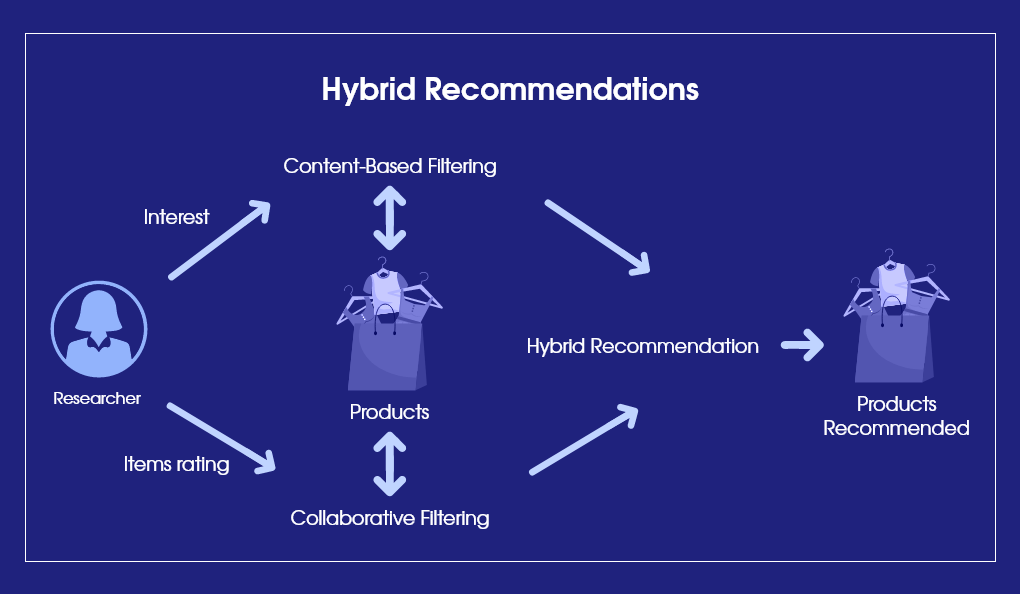

 ### **Problem Statement:**
In the context of music streaming services like Spotify, providing personalized track recommendations is essential for improving user engagement. However, building an effective recommender system poses challenges such as sparse user interaction data and the introduction of new items.

This project aims to develop a hybrid recommender system that combines collaborative filtering and content-based filtering to recommend Spotify tracks based on both user interaction history and track attributes. The key problem is to address the limitations of each approach:

- **Collaborative filtering** often struggles with the cold start problem, where new users or tracks lack sufficient interaction data.
- **Content-based filtering** can generate narrow recommendations, limited by the user’s previous preferences.

The objective is to build a system that blends both techniques, improving recommendation quality by leveraging user behavior patterns and the intrinsic features of tracks, such as danceability and energy. The hybrid approach is expected to deliver more diverse and accurate music recommendations, solving both cold start issues and providing variety in suggestions.



### **Significance in Data Science:**
Recommender systems, particularly hybrid systems, are a cornerstone of modern data science applications due to their significant role in enhancing user experience and driving business outcomes across various domains. The significance of hybrid recommender systems in data science can be understood from several perspectives:

- **Personalization:** One of the primary goals in data science is to create personalized experiences for users based on data-driven insights. Recommender systems excel at this by analyzing vast amounts of user interaction data and item attributes to suggest content that aligns with individual preferences. By combining collaborative filtering (user behavior) and content-based filtering (item characteristics), hybrid systems offer more personalized recommendations, enhancing user satisfaction and retention. This is critical in industries such as music streaming, e-commerce, and social media, where personalization drives user engagement.

- **Handling Sparse Data:** Hybrid recommender systems address a common challenge in data science: sparse data. For new users or items with little historical data (the cold start problem), collaborative filtering methods can struggle to provide meaningful recommendations. By integrating content-based filtering, which relies on item attributes rather than user interactions, hybrid systems ensure that recommendations are still possible, even when user interaction data is limited. This capability to handle sparse or incomplete data makes hybrid recommenders highly robust.

- **Enhancing Predictive Accuracy:** In data science, improving predictive accuracy is a core goal. Hybrid recommendation systems enhance predictive performance by leveraging both user behavior patterns and item features. Combining collaborative and content-based filtering models allows the system to tap into multiple dimensions of data, leading to more accurate and diverse recommendations. This approach helps balance relevance and diversity, a key factor in keeping users engaged over time.


## Building the Recommendation System

### Import Libraries

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import NearestNeighbors


### Load the Dataset

In [133]:
# Load the dataset
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)
dataset_path = path + '/dataset.csv'  # Adjust the file name accordingly

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


This code downloads the Spotify tracks dataset from Kaggle using kagglehub, prints the file path, and loads the dataset into a Pandas DataFrame (df) for further processing.

### **Data Preprocessing:**
Data preprocessing is a critical step in building any machine learning model, including a hybrid recommender system. The goal of preprocessing is to ensure that the data is clean, standardized, and in a format that can be effectively used by the recommendation algorithms. For this project, the dataset includes several features related to Spotify `tracks`, such as `track_id`, `track_name`, `artists`, and numerical attributes like `danceability`, `energy`, `tempo`, and more. Here’s how the data was cleaned and prepared for analysis.

In [134]:
print("Dataset shape:", df.shape)


Dataset shape: (114000, 21)


The Dataset contains 114,000 rows and 21 columns, indicating the number of tracks and attributes in the dataset.

In [135]:
print("Columns:", df.columns)


Columns: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [136]:
print("Data types:\n", df.dtypes)

Data types:
 Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


### **Features**:
--------------------------------------------
- `track_id`: The unique Spotify ID for identifying tracks.
- `artists`: Lists the artists who performed the track; if more than one, they are separated by a semicolon.
- `album_name`: Indicates the album the track is part of.
- `track_name`: Provides the name of the track.
- `popularity`: A score between 0 and 100 representing the track's popularity, calculated based on play count and recency.
- `duration_ms`: The length of the track in milliseconds.
- `explicit`: A boolean flag indicating whether the track contains explicit content.
- `danceability`: Describes how danceable a track is, ranging from 0 (least) to 1 (most).
- `energy`: Measures the intensity and activity of the track, ranging from 0 (low) to 1 (high).
- `key`: Represents the musical key of the track, mapped to integers using standard Pitch Class notation.
- `loudness`: Reflects the loudness of the track in decibels.
- `mode`: Indicates whether the track is in a major (1) or minor (0) key.
- `speechiness`: Detects spoken words in the track; higher values suggest more speech-like content.
- `acousticness`: A confidence measure of whether the track is acoustic, with values closer to 1 indicating acoustic tracks.
- `instrumentalness`: Predicts whether a track contains no vocals; values closer to 1 suggest it is instrumental.
- `liveness`: Detects if a live audience is present during the recording.
- `valence`: A measure of the track’s emotional positivity, where higher values indicate more positive sounds.
- `tempo`: The speed of the track in beats per minute (BPM).
- `time_signature`: Indicates how many beats are in each bar or measure.
- `track_genre`: The genre category of the track.


### Handling Missing Values
--------------------------------------------


Check the number of missing values in each column of the DataFrame df

In [137]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


There are missing values in columns artists, album_name and track_name for one row

This code visualizes the missing data in the DataFrame df using a bar plot. The msno.bar() function from the missingno library displays the distribution of missing values across all columns. A custom blue color is applied to the bars, and the plot is displayed with a large figure size and title.

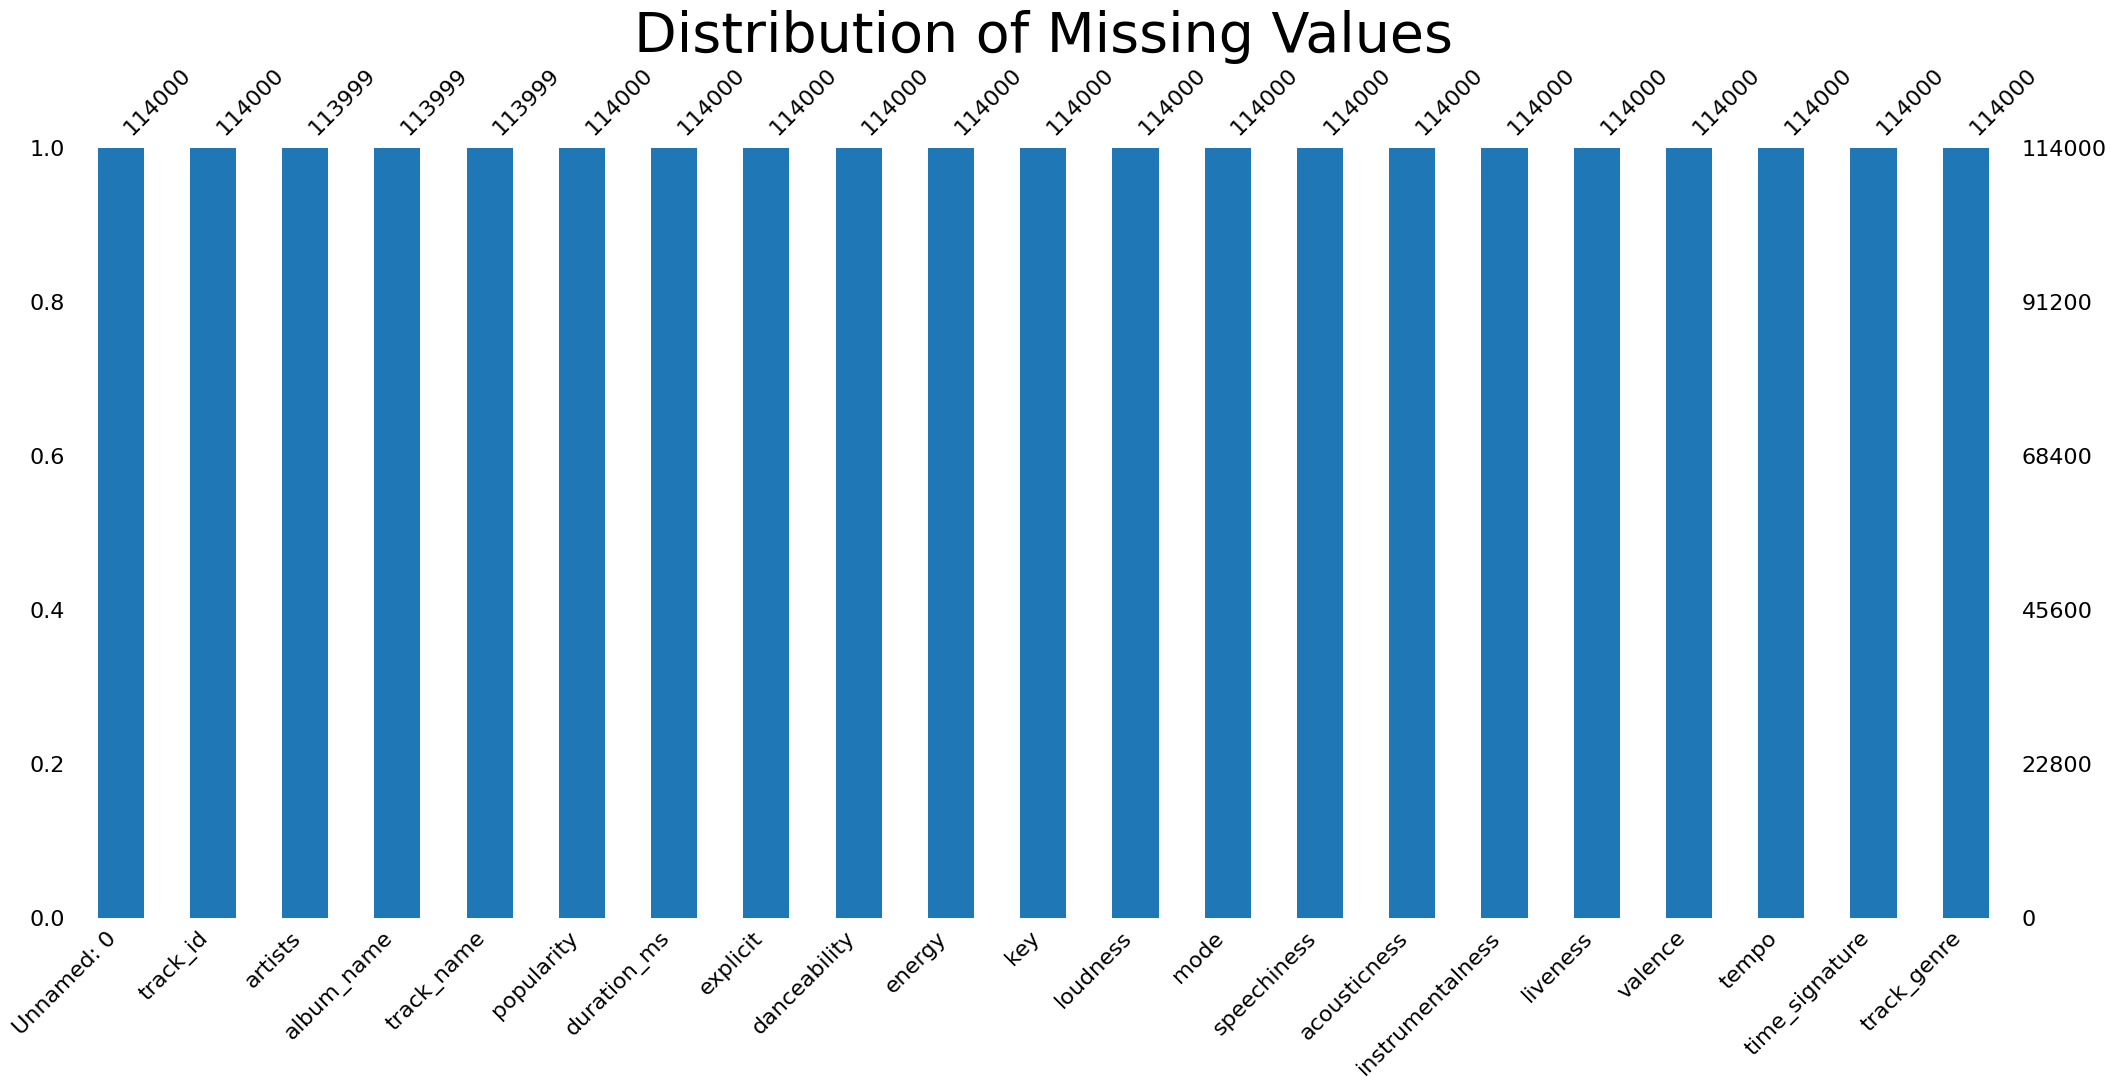

In [138]:
# Visualize missing data with a bar plot
plt.figure(figsize=(30, 10))
msno.bar(df, color=(0.12, 0.47, 0.71))  # Custom blue color
plt.title('Distribution of Missing Values', fontsize=40)
plt.show()

This code separates the numeric and non-numeric columns in the DataFrame df. For the numeric columns, missing values are filled with the mean, and for non-numeric columns, missing values are filled with a placeholder ('Unknown') or the mode. After filling in the missing values, it verifies that no missing data remains by printing the shape of the DataFrame and the count of missing values. Finally, it creates two copies of the cleaned DataFrame (df_cleaned and df_cleaned_cf) for further analysis, ensuring that the data is prepared for modeling tasks like content-based and collaborative filtering.

In [139]:
#  Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in non-numeric columns with a placeholder or mode
df[non_numeric_cols] = df[non_numeric_cols].fillna('Unknown')

# Verify if all missing values are handled
print("Shape after filling missing values:", df.shape)
print("Missing values after filling:\n", df.isnull().sum())

df_cleaned = df.copy()

df_cleaned_cf = df.copy()

Shape after filling missing values: (114000, 21)
Missing values after filling:
 Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


All the missing values have been handled

In [140]:
#checking if the any data is missing
df_cleaned.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


### Checking for Columns with Unique values
--------------------------------------------

In [141]:
df_cleaned.nunique()

,0
Unnamed: 0,114000
track_id,89741
artists,31438
album_name,46590
track_name,73609
popularity,101
duration_ms,50697
explicit,2
danceability,1174
energy,2083


The column Unnamed: 0 represents an index or row identifier automatically generated when the dataset was imported, and it doesn't provide any meaningful information for analysis. Since it contains a unique value for every row (114,000 unique values), it's simply an index column that duplicates the functionality of the DataFrame's index. So , the column can be dropped.

In [142]:
df_cleaned = df_cleaned.drop(["Unnamed: 0"],axis = 1)

## **Data Analysis:**
### Univariate Analysis

In [143]:
# statistical information of data in dataframe
df_cleaned.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Observations so far:
--------------------------------------------

1. **Popularity**: Mean of 33.24, with scores ranging from 0 to 100. Tracks are moderately popular, with 75% of tracks having a score of 50 or less.

2. **Duration (ms)**: Average track length is ~ 3.8 minutes. The range includes some very short tracks (0 ms) and very long ones (~87 minutes).

3. **Danceability**: Mean of 0.57, with a broad range from 0 (least danceable) to 0.985 (most danceable).

4. **Energy**: Average energy is 0.64, with values ranging from 0 to 1, indicating most tracks have moderate to high energy levels.

5. **Key and Mode**: Key ranges from 0 to 11 (various musical keys), and mode is mostly major (mean ~0.64).

6. **Tempo**: Mean tempo is 122 BPM, with a range from 0 to 243 BPM, showing a wide variation in track speeds.

In [144]:

# Visualization for Spotify Tracks Dataset

# List of continuous (numerical) features in the dataset
numerical_ft = ['danceability', 'energy', 'loudness', 'tempo', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'popularity', 'duration_ms']


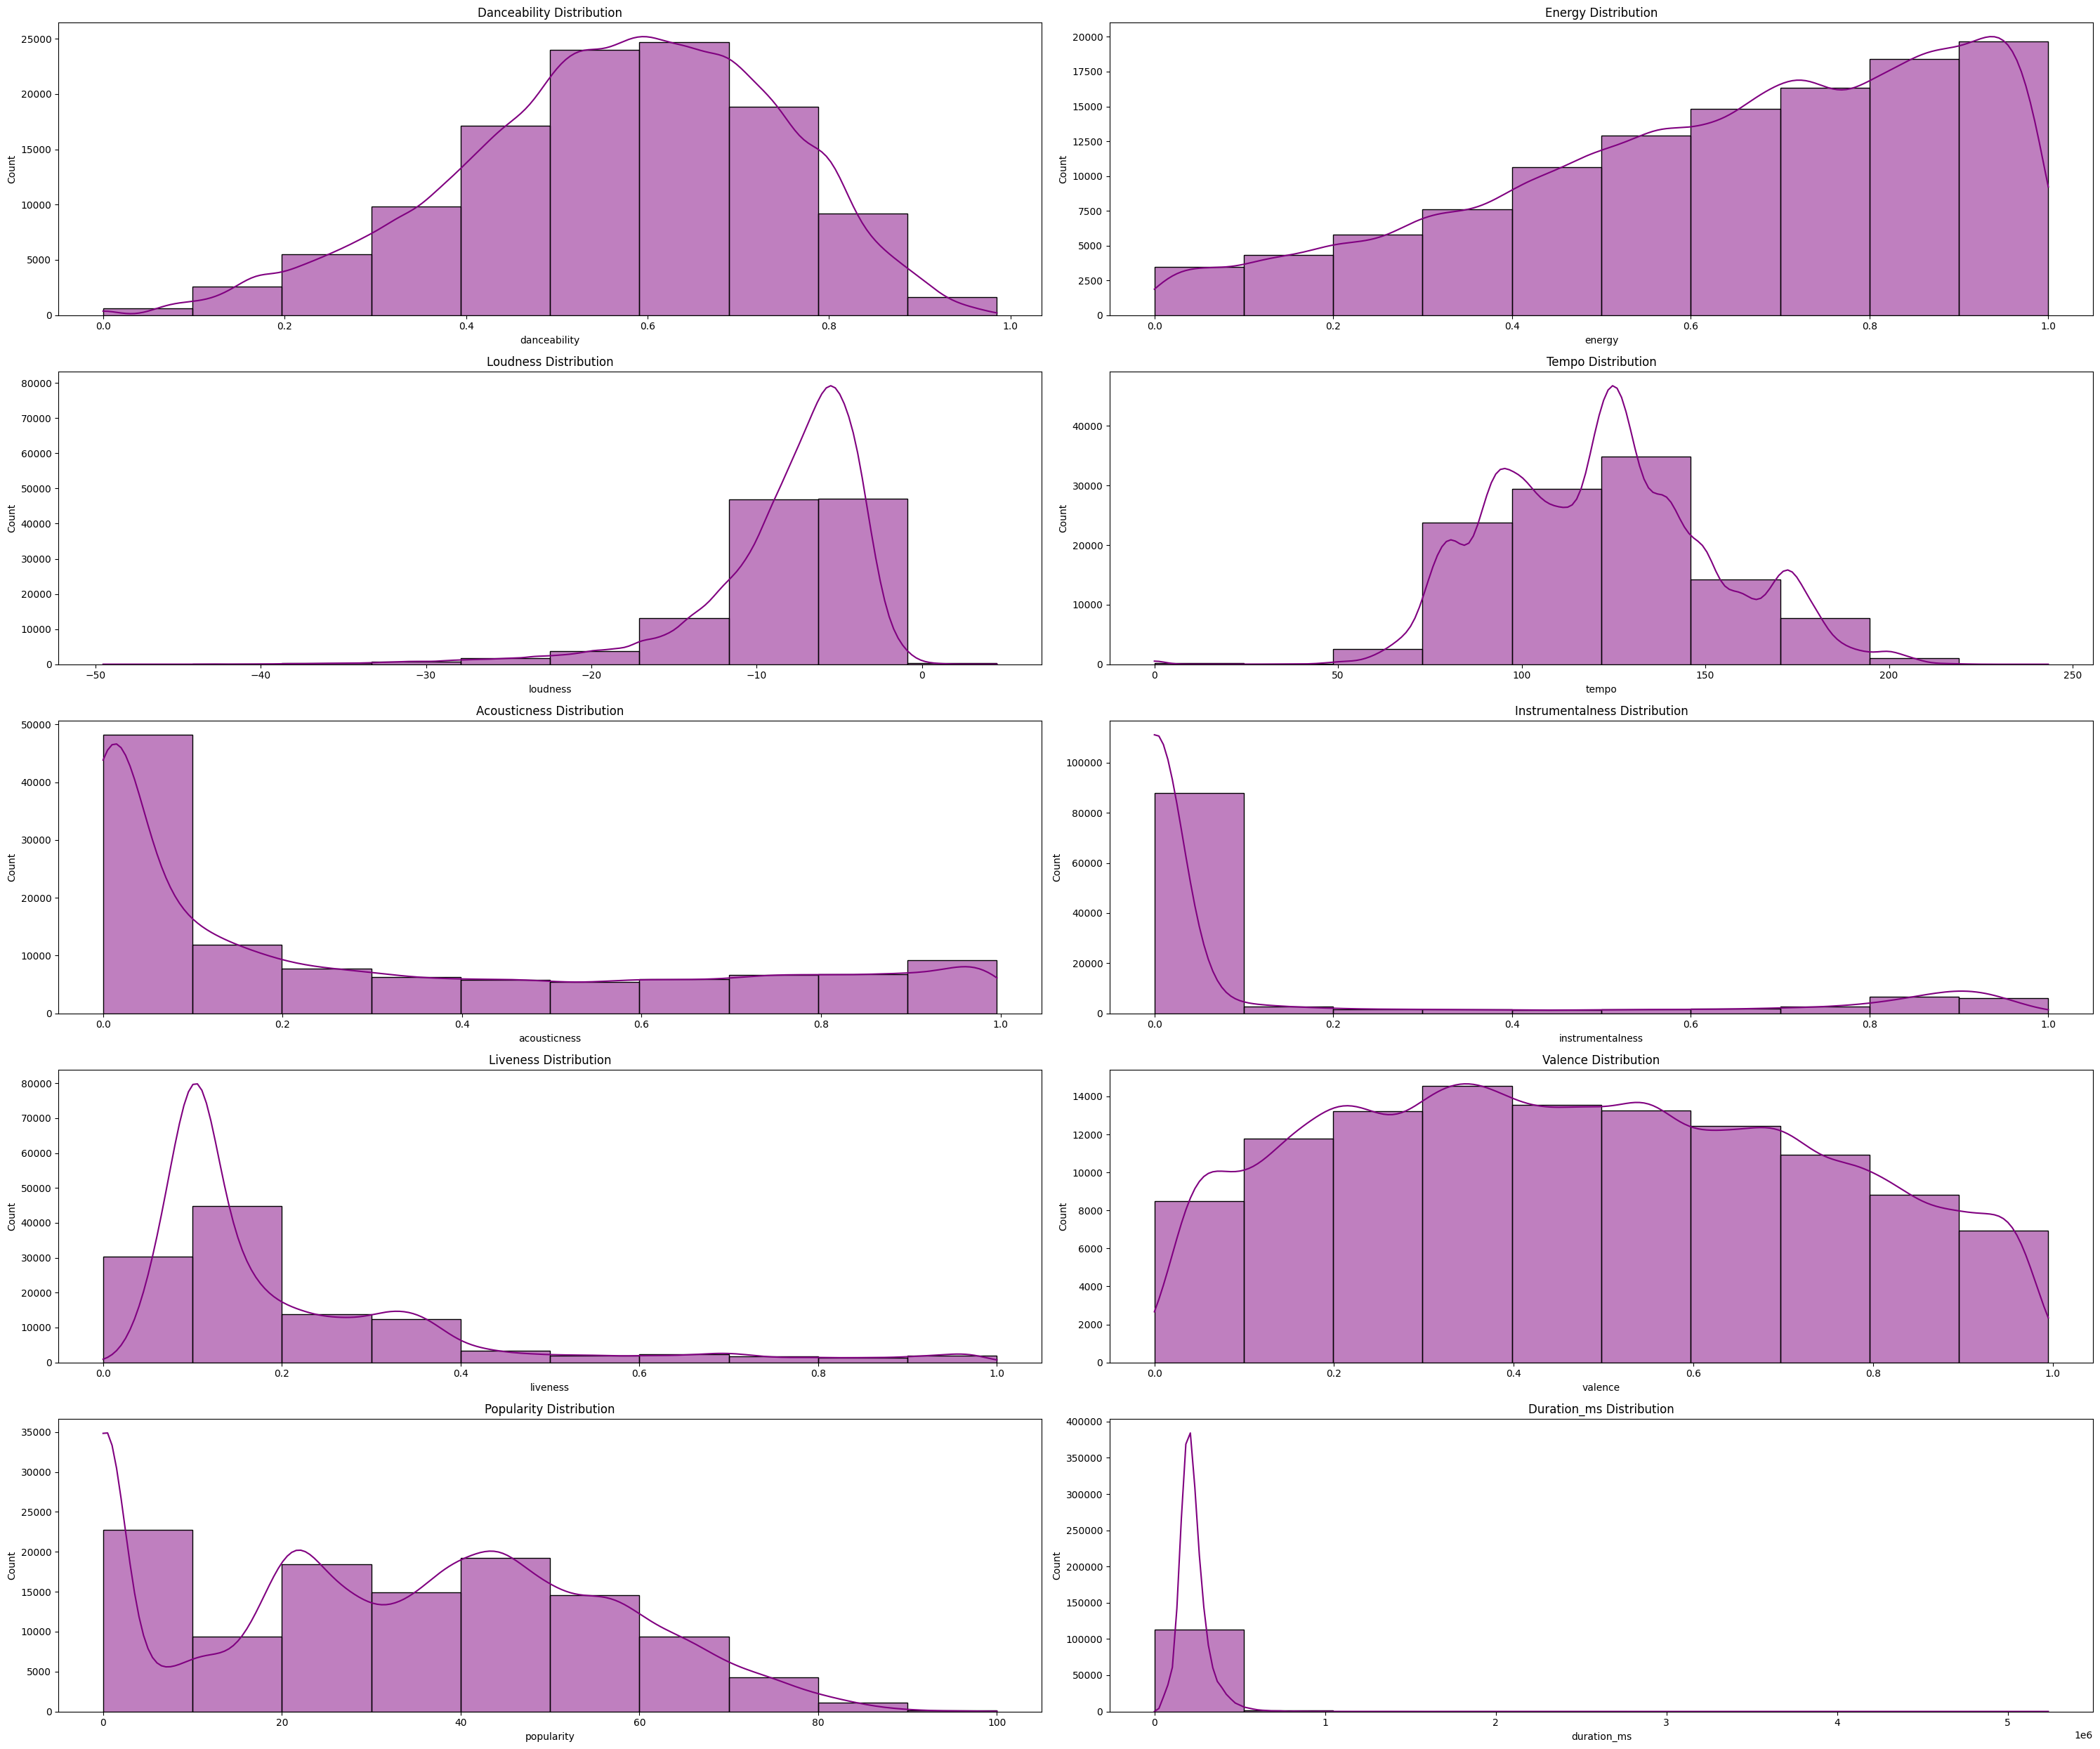

In [145]:
# Histogram plots for continuous features
plt.figure(figsize=(30, 25))
for i, col in enumerate(numerical_ft, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_cleaned[col], kde=True, bins=10, color='purple')
    plt.title(f'{col.capitalize()} Distribution')
plt.tight_layout()
plt.show()

### Observations from the Graph:
--------------------------------------------

1. **Danceability**: The distribution is relatively normal, with most tracks having moderate danceability (around 0.5 to 0.7). The range is broad but peaks in the middle.

2. **Energy**: The energy distribution skews slightly towards higher values, with more tracks having high energy (above 0.6). Tracks with lower energy are less common.

3. **Loudness**: The distribution peaks around -10 dB, with most tracks falling in the -20 dB to 0 dB range, indicating that most tracks are moderately loud.

4. **Tempo**: The tempo distribution is bimodal, with peaks around 100-125 BPM and 180-200 BPM, showing two common ranges for track tempos.

5. **Acousticness**: The distribution is skewed heavily toward low acousticness values, with most tracks being less acoustic and only a few highly acoustic tracks.

6. **Instrumentalness**: Most tracks have very low instrumentalness (close to 0), suggesting that most tracks contain vocals. Only a small portion is highly instrumental.

7. **Liveness**:  The distribution is skewed towards lower values, indicating that most tracks have minimal live audience sound. Few tracks are likely live recordings.

8. **Valence**: The valence distribution is roughly uniform, meaning tracks have an even spread across positive and negative emotions.

9. **Popularity**: Popularity is skewed towards lower values, with most tracks having a popularity score between 0 and 20. Highly popular tracks are fewer.

10. **Duration (ms)**: The track duration distribution is highly skewed, with most tracks having durations between 2 and 4 minutes, and a few outliers with much longer durations.

These observations give insights into the overall characteristics of the Spotify tracks dataset, highlighting key trends like the prominence of energetic tracks, common tempos, and the rarity of highly acoustic or instrumental tracks.

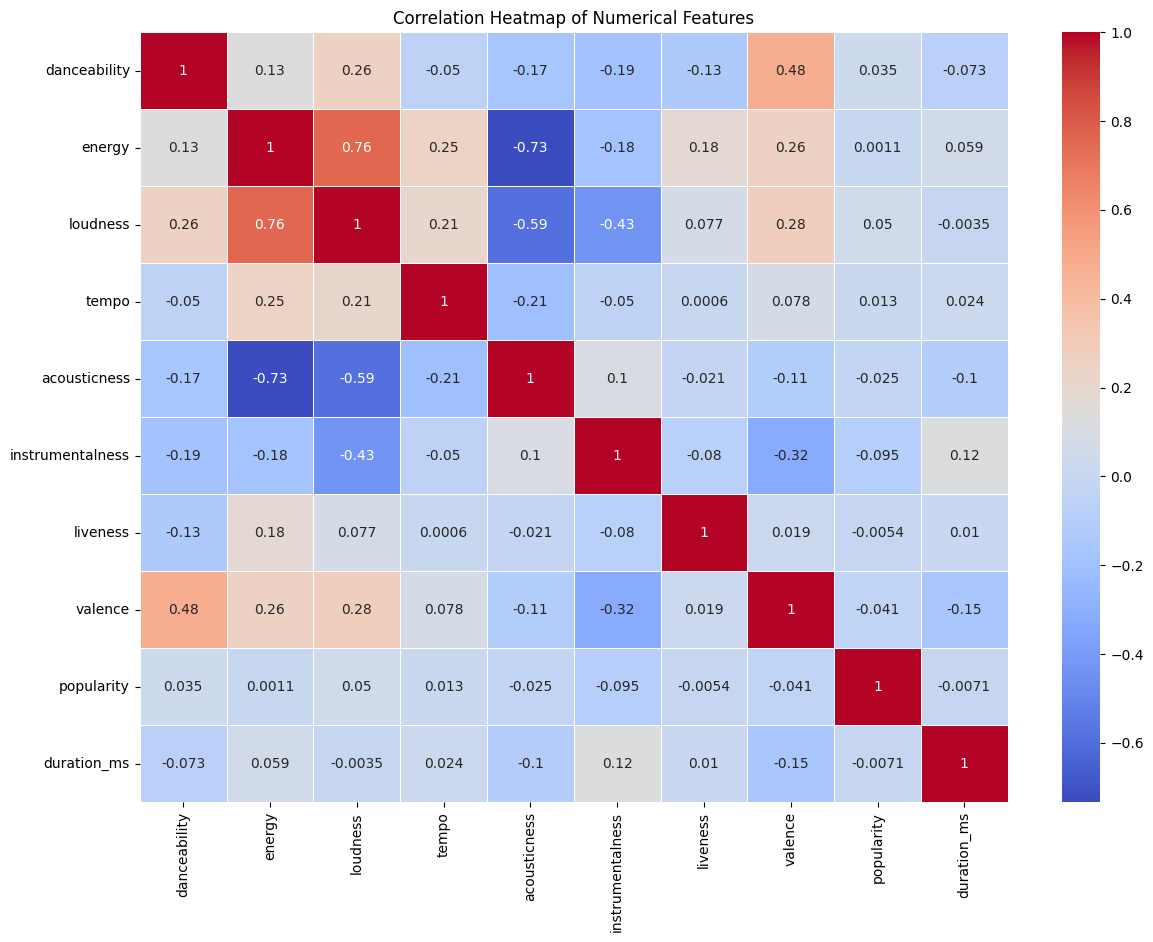

In [146]:
# Heatmap for correlations between numerical features
plt.figure(figsize=(14, 10))
corr = df_cleaned[numerical_ft].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Observations from the Correlation Heatmap:
--------------------------------------------

1. **Energy and Loudness**:
   - **High correlation** (0.76), indicating that tracks with higher energy are also likely to be louder. This makes sense as energetic tracks often have louder dynamics.

2. **Danceability and Valence**:
   - **Moderate positive correlation** (0.48), suggesting that more danceable tracks tend to have a higher valence, meaning they convey more positive emotions.

3. **Acousticness and Energy**:
   - **Strong negative correlation** (-0.73), meaning that tracks with high acousticness tend to have lower energy. Acoustic tracks are often softer and less intense.

4. **Acousticness and Loudness**:
   - **Moderate negative correlation** (-0.59), showing that more acoustic tracks are typically quieter.

5. **Valence and Instrumentalness**:
   - **Negative correlation** (-0.32), indicating that instrumental tracks tend to have a lower valence, suggesting they might convey more neutral or negative emotions.

6. **Energy and Valence**:
   - **Weak positive correlation** (0.26), suggesting a slight tendency for more energetic tracks to also be more positive.

7. **Danceability and Popularity**:
   - Very **weak correlation** (0.035) between danceability and popularity, suggesting that how danceable a track is doesn’t have a strong impact on its popularity.

8. **Popularity and Other Features**:
   - Popularity shows almost no strong correlations with other features, indicating that factors like energy, danceability, or acousticness don't directly influence a track’s popularity.

Overall, the heatmap highlights several strong and moderate correlations, especially between energy, loudness, and acousticness. However, many features (like popularity) show weak or no correlations with other attributes.

### **Outlier Handling**
----------------------------
Outliers are data points that significantly differ from the rest of the dataset and can potentially skew results, especially in statistical analysis or machine learning models. Handling outliers is crucial to ensure that the model or analysis captures the true trends in the data.

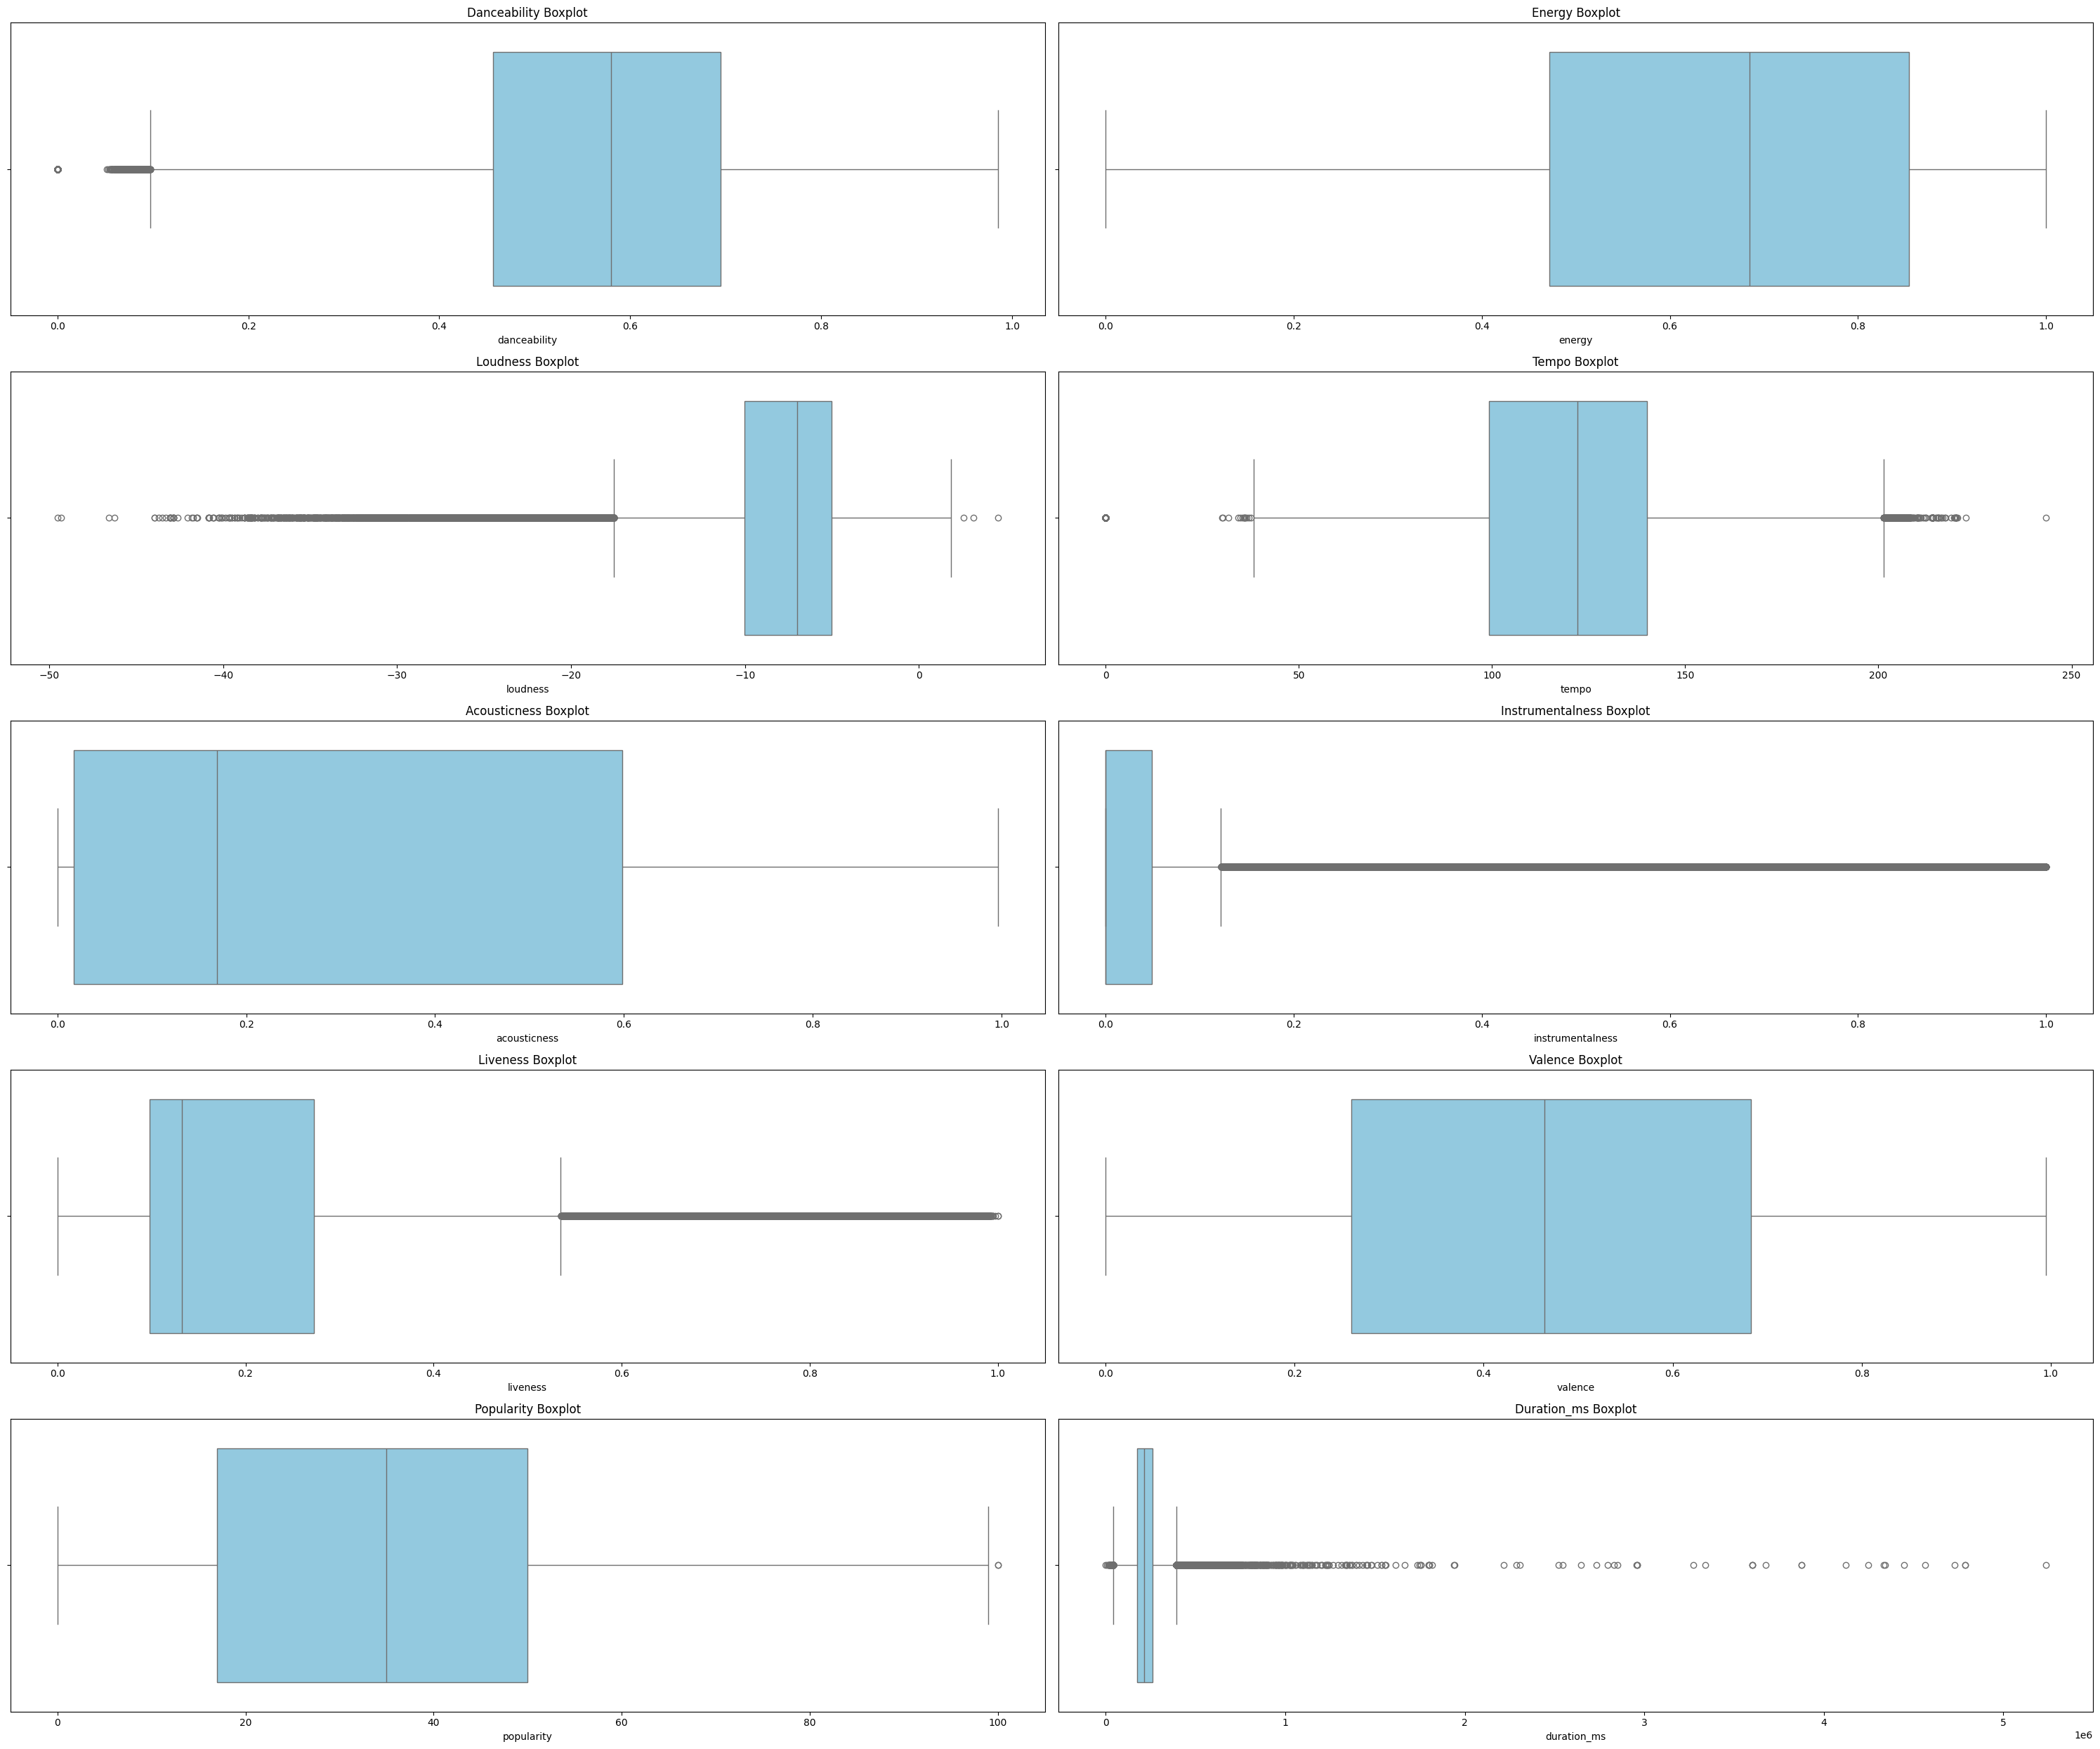

In [147]:
# Boxplots for Outlier Detection in Numerical Features
plt.figure(figsize=(30, 25))
for i, col in enumerate(numerical_ft, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_cleaned[col], color='skyblue')
    plt.title(f'{col.capitalize()} Boxplot')
plt.tight_layout()
plt.show()

### **Outliers Observed in the Boxplots:**
--------------------------------------------
1. **Danceability**: Few minor outliers are present on the lower end of the scale, but most tracks fall within a normal range.

2. **Energy**: There are no significant outliers in the energy feature, with most tracks falling between 0.3 and 1.0.

3. **Loudness**: Numerous outliers on the lower end, with some tracks having much lower loudness values than the rest of the dataset. This suggests there may be quieter or acoustic tracks with extreme loudness values.

4. **Tempo**: Some outliers exist on both ends, indicating a few tracks with extremely high or low tempo values compared to the majority.

5. **Acousticness**: No significant outliers, but the feature is skewed, with many tracks having very low acousticness and a few tracks with high values.

6. **Instrumentalness**: Many outliers are present, especially on the higher end, where several tracks are purely instrumental (close to 1.0) but most tracks have very low instrumentalness.

7. **Liveness**: There are a considerable number of outliers on the high end, suggesting a few tracks with significant live audience presence, while most tracks have low liveness.

8. **Valence**: No significant outliers are observed in this feature, with a fairly even spread of values.

9. **Popularity**: A few outliers exist on the higher end, where some tracks are significantly more popular than the average, but most tracks fall within a normal range.

10. **Duration (ms)**: Many extreme outliers on the higher end of the scale, indicating some tracks with unusually long durations, while the majority of tracks have more standard durations.


In [148]:
# Function to handle outliers using the IQR method
def handle_outliers_iqr(df, feature, fac=1.5):  # fac = 1.5 or 2 based on use case
    Qan1 = df[feature].quantile(0.25)
    Qan3 = df[feature].quantile(0.75)
    IQR = Qan3 - Qan1
    lower_limit = Qan1 - fac * IQR
    upper_limit = Qan3 + fac * IQR

    # Impute outliers by replacing them with the mean
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
    return df

# List of continuous features to handle outliers
numerical_ft = ['danceability', 'energy', 'loudness', 'tempo', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'popularity', 'duration_ms']

# Apply the outlier handling function to all numerical features
for feature in numerical_ft:
    df_cleaned = handle_outliers_iqr(df_cleaned, feature, fac=1)




<ipython-input-148-0ab2bd431357>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.2385350877193' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
<ipython-input-148-0ab2bd431357>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '228029.15311403509' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()


The IQR method to detect and handle outliers in continuous features by calculating the first (Q1) and third quartiles (Q3). Any values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers and are replaced with the feature's mean. The process is applied to multiple numerical features like danceability, energy, loudness, etc.

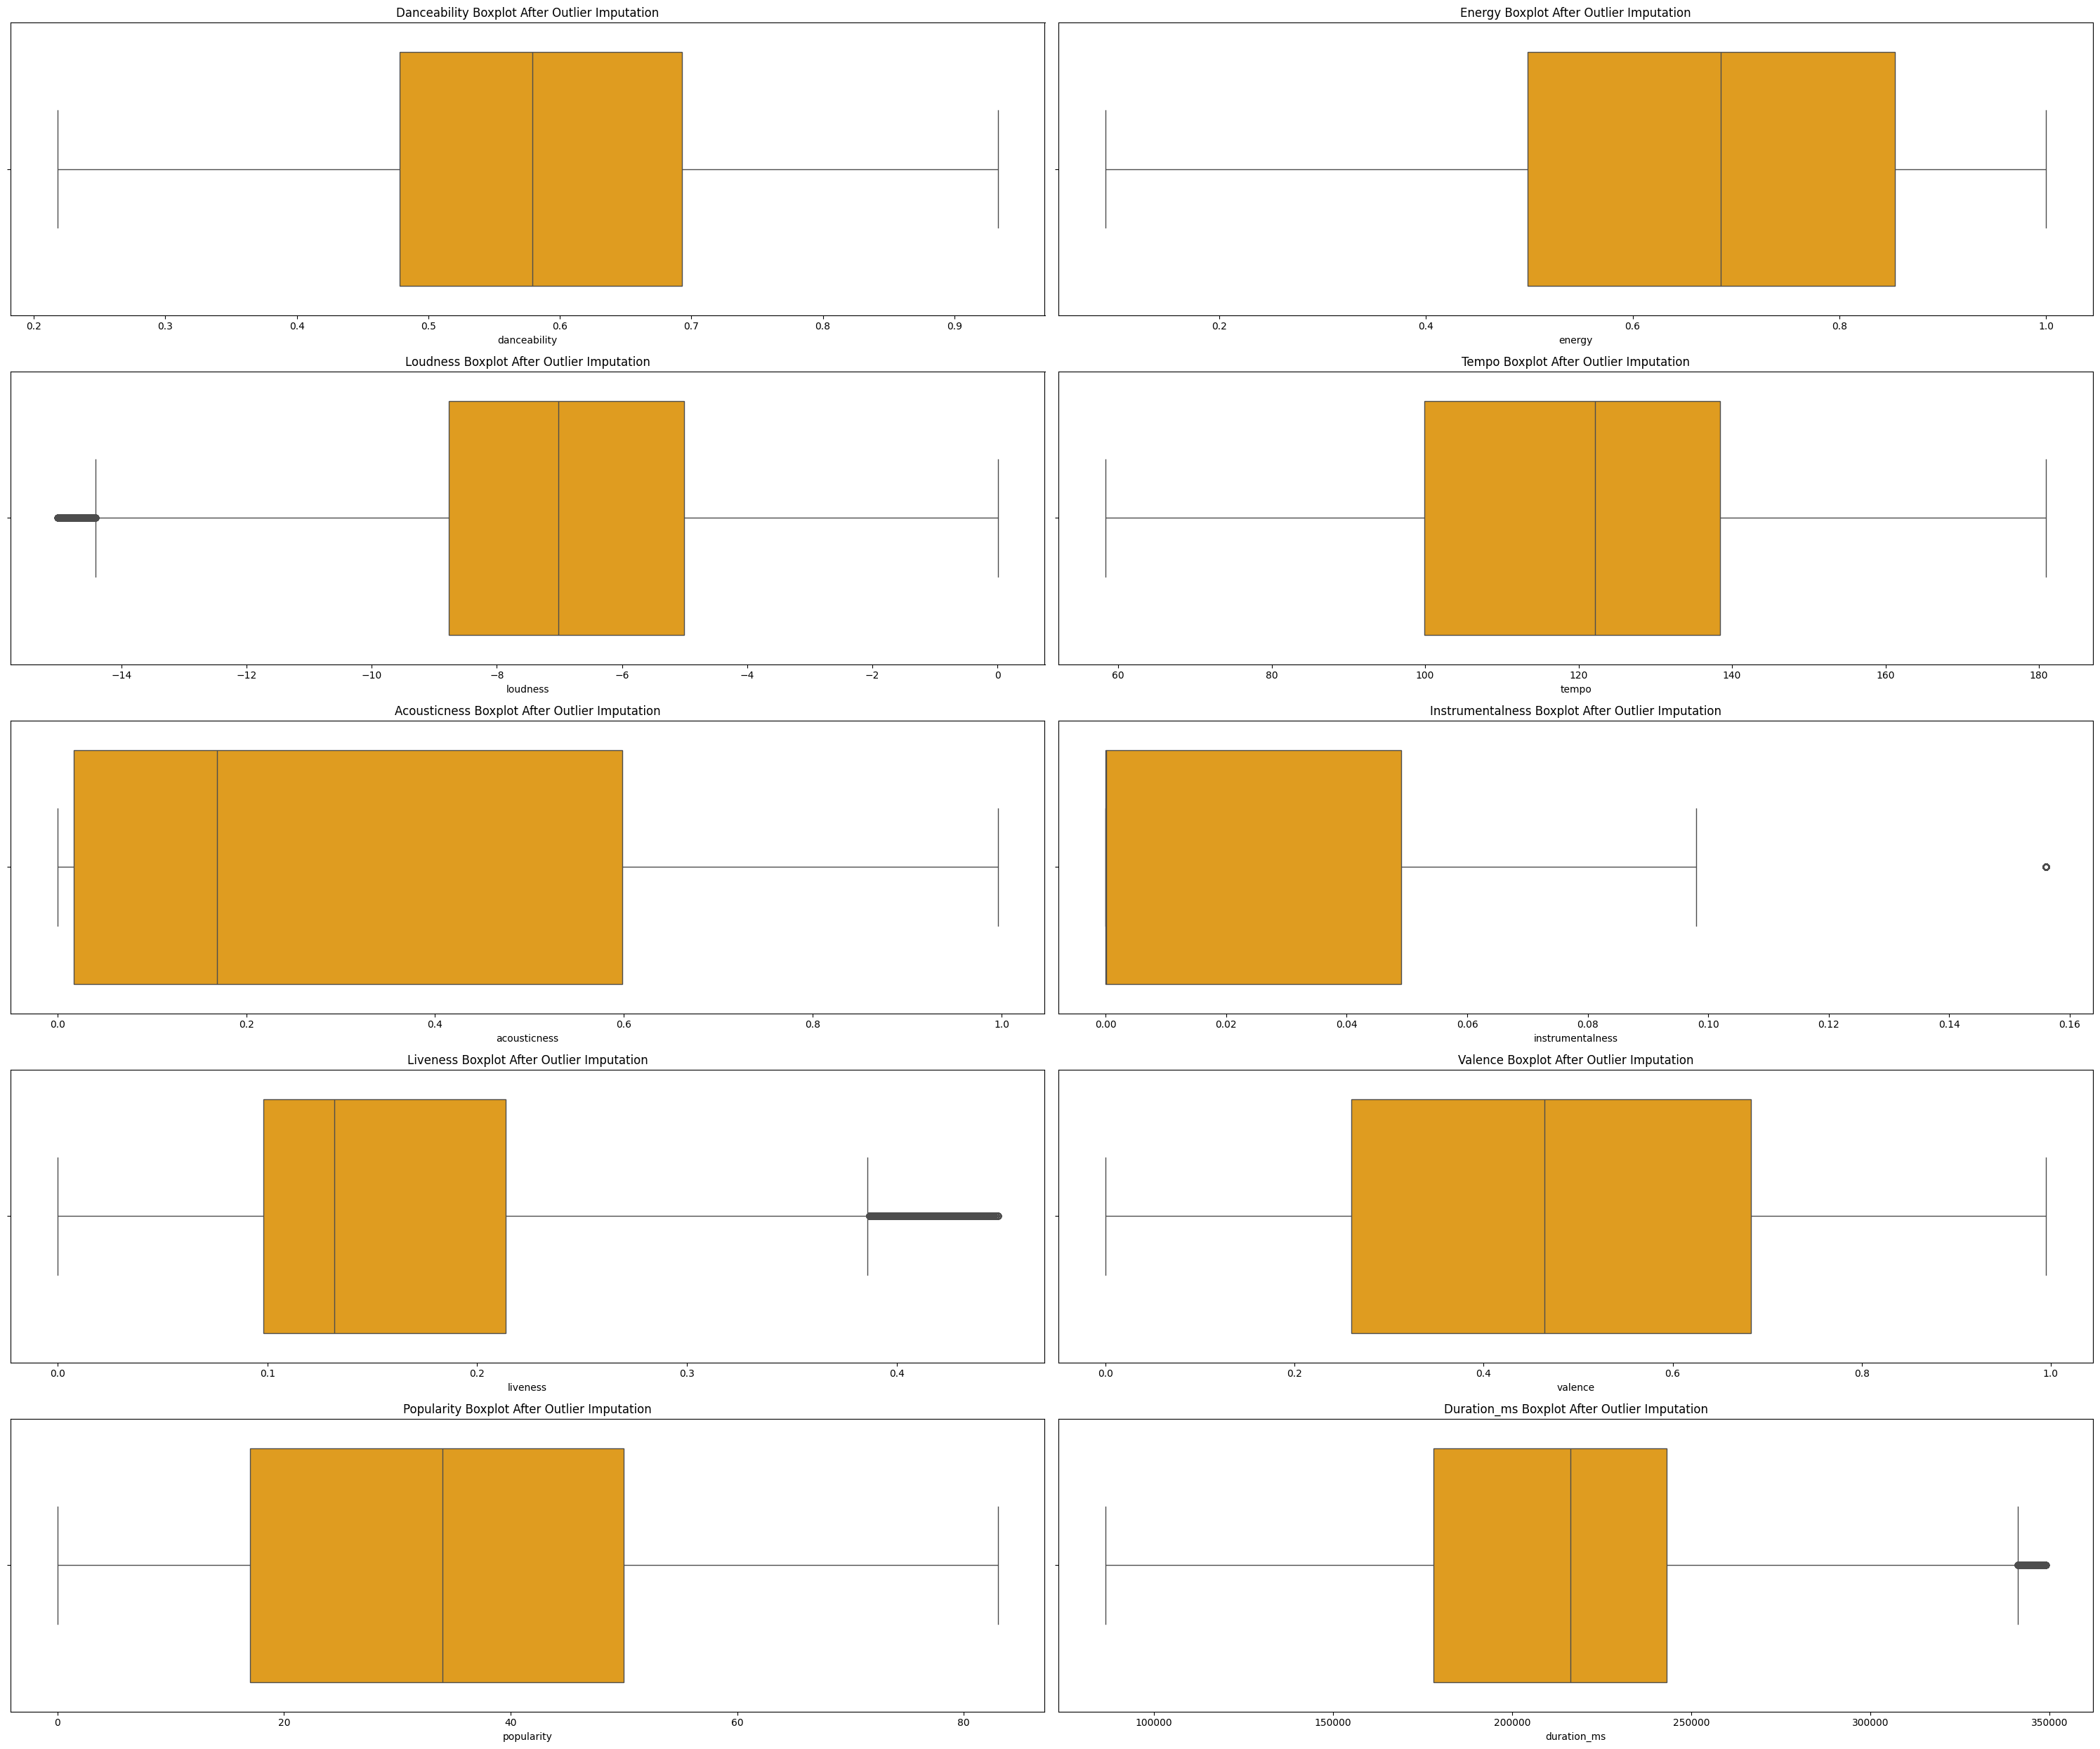

In [149]:
# Verify if outliers are handled by checking boxplots again
plt.figure(figsize=(30, 25))
for i, col in enumerate(numerical_ft, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_cleaned[col], color='orange')
    plt.title(f'{col.capitalize()} Boxplot After Outlier Imputation')
plt.tight_layout()
plt.show()

Most of the outliers are handled when compared with previous box plot graph.

### **Categorical Encoding**
---------------------------------------
This code performs Label Encoding on the categorical feature track_genre:

The LabelEncoder() converts each unique genre into a numerical label.
The new encoded values are stored in the track_genre_encoded column.

In [150]:
#Categorical Encoding (Label Encoding for 'track_genre')

# Encoding categorical column 'track_genre'
label_encoder = LabelEncoder()
df_cleaned['track_genre_encoded'] = label_encoder.fit_transform(df_cleaned['track_genre'])
print(df_cleaned[['track_genre', 'track_genre_encoded']])


        track_genre  track_genre_encoded
0          acoustic                    0
1          acoustic                    0
2          acoustic                    0
3          acoustic                    0
4          acoustic                    0
...             ...                  ...
113995  world-music                  113
113996  world-music                  113
113997  world-music                  113
113998  world-music                  113
113999  world-music                  113

[114000 rows x 2 columns]


### **Feature Scaling**
------------------------------------------
Feature scaling ensures that numerical features are on the same scale, preventing any single feature from dominating the model due to larger magnitude values.

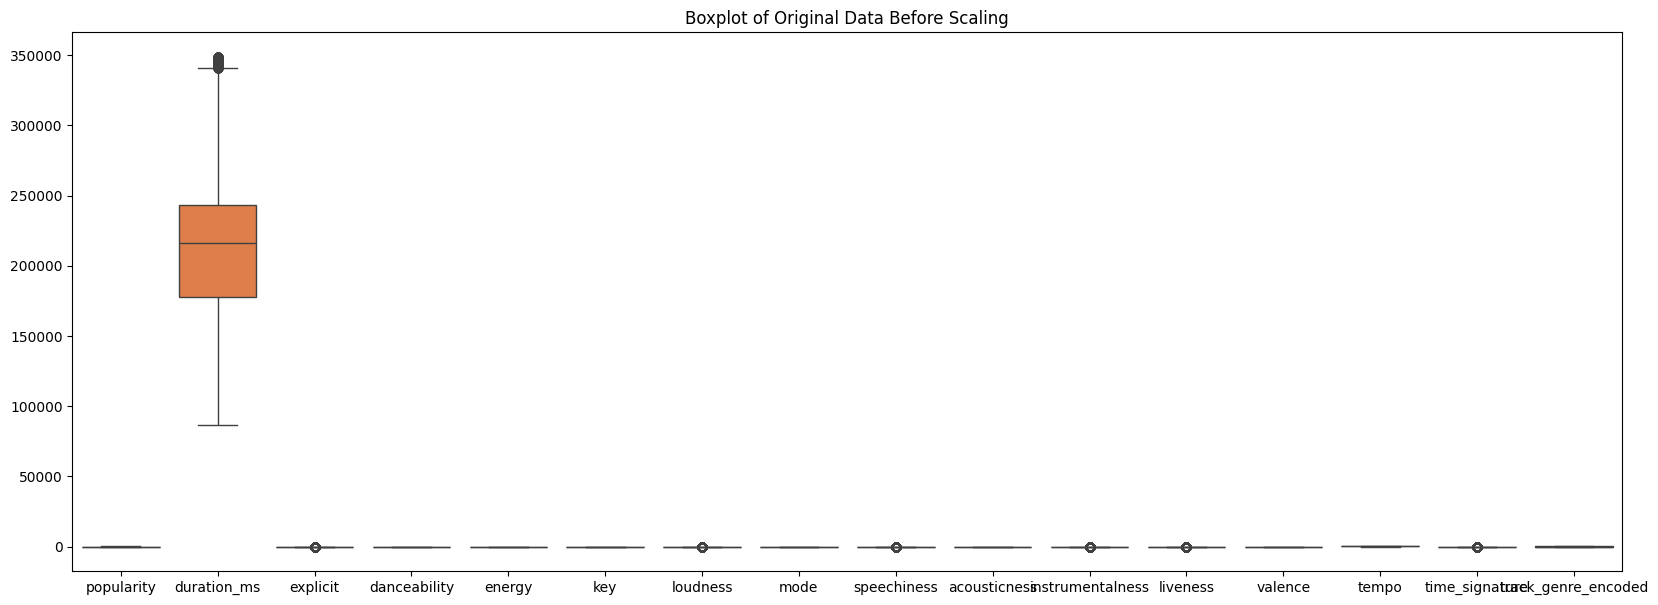

In [151]:
#Feature Scaling Using Min-Max Scaler

#Visualize the original data using boxplot before feature scaling
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_cleaned)
plt.title("Boxplot of Original Data Before Scaling")
plt.show()

#### The above diagram shows that all the predictors are not in the same range. So, it is advisable to scale all the features in same range for better modelling.
#### Scaling can be done in different ways like
1. Normalizing
2. Standardizing

- Normalization is effective when you know that your data is not following a Gaussian distribution(bell curve) and it scales the data in between 0 and 1.
- Standardization can be used when the data follows Gaussian distribution. However it need not necessarily be the exact Gaussian distribution but it is effective on a gaussianlly distributed data.

In [152]:
# Create the Min-Max Scaler and fit-transform the numerical features
min_max_scaler = MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(df_cleaned[numerical_ft])

# Replace the original values with the scaled values
df_cleaned[numerical_ft] = pd.DataFrame(scaled_values, columns=numerical_ft)


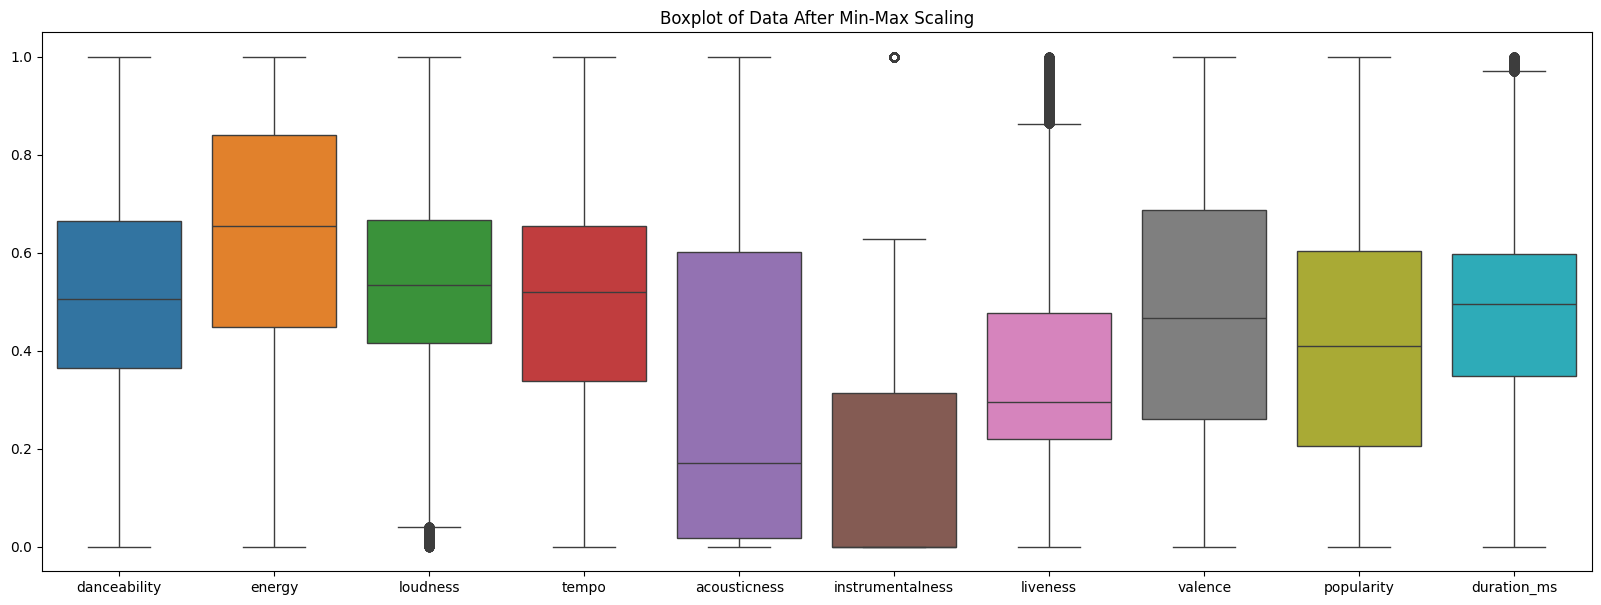

In [153]:
#Visualize the scaled data using boxplot
plt.figure(figsize=(20, 7))
sns.boxplot(data=df_cleaned[numerical_ft])
plt.title("Boxplot of Data After Min-Max Scaling")
plt.show()

All features are in same scale and are comparible.

## Feature Selection Process for Recommender Systems
Feature selection for both content-based filtering and collaborative filtering is a crucial step. Here's an overview of how we select relevant features for each method:

### 1. Content-Based Filtering Feature Selection
In content-based filtering, the recommendation system suggests items (tracks) that are similar to what the user has already engaged with, based on item attributes. The goal is to choose features that best describe the characteristics of the items (songs in this case).

### How We Choose Features for Content-Based Filtering:
- Relevance to User Experience: The features must represent key attributes that users typically consider when choosing a song. For example, features like danceability, energy, tempo, acousticness are directly tied to a user's experience with a song.

- Uniqueness and Diversity: Features like track_genre help add diversity to the recommendation system, ensuring that songs from the same genre or style are recommended.

### Feature Selection Criteria:
- Continuous/Numeric Features: For continuous features, we usually focus on audio characteristics (e.g., danceability, energy, tempo) because these capture the essence of a track's "feel."

- Categorical Features: Features like track_genre provide a high-level grouping of tracks. This helps in creating more meaningful recommendations across genres.

- Selected Features for Content-Based Filtering:
* `danceability`: Describes how suitable a track is for dancing.
* `energy`: Represents intensity and activity.
* `tempo`: Speed of the song (beats per minute).
* `acousticness`: Confidence measure of whether a track is acoustic.
* `instrumentalness`: Likelihood that the track contains no vocals.
* `liveness`: Detects the presence of a live audience.
* `valence`: Describes the musical positiveness conveyed by a track.
* `track_genre`: Genre or category to which the track belongs.


### 2. Collaborative Filtering Feature Selection
In collaborative filtering, the system relies on user-item interactions to make recommendations. Since we do not have explicit user ratings in the dataset, we can use popularity as a proxy for user engagement. The higher the popularity, the more interactions a song has likely had with users.

### How We Choose Features for Collaborative Filtering:
User-Item Interactions: The core of collaborative filtering is the relationship between users and items. In this case, we use popularity as a substitute for user ratings or listens. Collaborative filtering models (like Neural Collaborative Filtering) learn patterns in user behavior based on these interactions.

- Unique Identifier: track_id is used as a unique identifier for each song, which we need to encode for use in machine learning models.

- Feature Selection Criteria:
User Interaction Proxy: In the absence of user ratings, we use popularity to reflect how often a track has been listened to or liked by users.

- Unique Identifier: The track_id ensures that each track is distinguishable, allowing us to create embeddings or associations between tracks and users.

- Selected Features for Collaborative Filtering:
* `track_id`: Unique identifier for each track.
* `popularity`: Proxy for user interaction (similar to user ratings in other datasets).



In [154]:
content_features = ['danceability', 'energy', 'tempo', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'track_genre_encoded']  # 'track_genre_encoded' after encoding

# Extract content-based features into a DataFrame
df_content = df_cleaned[content_features]

# Selecting features for Collaborative Filtering
collaborative_features = ['track_id', 'popularity']

# Extract collaborative filtering features into a DataFrame
df_collaborative = df_cleaned[collaborative_features]

# Verifying the selected features
print("Content-Based Features:\n", df_content.head())
print("\nCollaborative Filtering Features:\n", df_collaborative.head())



Content-Based Features:
    danceability    energy     tempo  acousticness  instrumentalness  liveness  \
0      0.640559  0.407692  0.241097      0.032329          0.000006  0.799107   
1      0.282517  0.083516  0.156004      0.927711          0.000036  0.225446   
2      0.307692  0.295604  0.146563      0.210843          0.000000  0.261161   
3      0.067133  0.605915  0.520423      0.908635          0.000453  0.294643   
4      0.559441  0.387912  0.502481      0.470884          0.000000  0.185045   

    valence  track_genre_encoded  
0  0.718593                    0  
1  0.268342                    0  
2  0.120603                    0  
3  0.143719                    0  
4  0.167839                    0  

Collaborative Filtering Features:
                  track_id  popularity
0  5SuOikwiRyPMVoIQDJUgSV    0.879518
1  4qPNDBW1i3p13qLCt0Ki3A    0.662651
2  1iJBSr7s7jYXzM8EGcbK5b    0.686747
3  6lfxq3CG4xtTiEg7opyCyx    0.855422
4  5vjLSffimiIP26QG5WcN2K    0.987952


## Content-Based Filtering Using Cosine Similarity:
-----------
**Content-Based Filtering** is a recommendation technique that uses item features (in this case, attributes of tracks) to recommend similar items. In the context of Spotify tracks, features like **danceability**, **energy**, **acousticness**, etc., are used to find songs similar to the one a user has interacted with.

The filtering process is based on **Cosine Similarity**, which calculates the similarity between two items based on the angle between their feature vectors. A smaller angle (closer to 0) indicates higher similarity.

#### Key Steps in the Code:

#### Step 1: **Scale the Numeric Features**
- The content features (e.g., **danceability**, **energy**) need to be scaled before using them in a similarity model. This is because some features may have vastly different ranges, which could distort the similarity calculation.
  - **StandardScaler** scales each feature to have a mean of 0 and a standard deviation of 1, ensuring they all contribute equally to the similarity calculation.

#### Step 2: **Fitting the Nearest Neighbors Model**
- A **Nearest Neighbors** model is trained on the scaled features using **Cosine Distance** as the distance metric. Cosine distance is preferred here as it measures the angle between two feature vectors, capturing the similarity between tracks based on their feature attributes.
  - The model is configured to return the top 5 nearest neighbors (n_neighbors=6 since one neighbor will be the track itself).
  - **Brute-force search** is used because the dimensionality of the feature space is manageable for direct distance calculation.

#### Step 3: **Recommendation Function**
- The function `recommend_tracks_with_scores` takes a **track input** (either a track index or name) and recommends similar tracks based on cosine similarity.
  - **Handle Input**: The function first checks if the input is an integer (index) or a string (track name). If it's a name, the index is retrieved from the dataset.
  
#### Step 4: **Finding Similar Tracks**
- Using the `kneighbors` method from the **Nearest Neighbors model**, the function finds the top 5 nearest neighbors for the selected track.
  - **Cosine Distance** is calculated between the input track and every other track based on the scaled content features.
  - The nearest neighbors are returned as indices, and the first neighbor (the track itself) is ignored.

#### Step 5: **Extracting Track Details**
- For each recommended track (from the nearest neighbors), the function extracts details like **track ID**, **track name**, **artist name**, and **track genre** from the original DataFrame (`df_cleaned`).
  
#### Step 6: **Similarity Scores**
- The similarity scores are calculated as `1 - distance` (since cosine distance gives the difference, not the similarity), where a score closer to 1 indicates high similarity to the input track.

#### Example:
- When the track "Aaya Na Tu" is input, the model returns the top 5 most similar tracks based on their feature similarities (e.g., **danceability**, **energy**, **acousticness**), and provides a similarity score for each recommendation.



In [155]:
# Step 1: Scale the numeric features and fit the Nearest Neighbors model only once
scaler = StandardScaler()
df_content_scaled = scaler.fit_transform(df_content)

# Initialize the Nearest Neighbors model with cosine distance
nn_model_content = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)  # Default n_neighbors is set to 6
nn_model_content.fit(df_content_scaled)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [156]:
def recommend_tracks_with_scores(track_input, df_content, df_cleaned, nn_model_content, n_neighbors=5):
    """
    Recommends tracks based on cosine similarity of content features and returns similarity scores.

    Parameters:
    track_input (int or str): Track index (int) or track name (str).
    df_content (DataFrame): DataFrame containing the content features.
    df_cleaned (DataFrame): DataFrame containing track details like name and artist.
    nn_model_content (NearestNeighbors): Pre-fitted Nearest Neighbors model.
    n_neighbors (int): Number of recommended tracks to return.

    Returns:
    DataFrame: Recommended tracks with track name, artist, genre, and similarity scores.
    """

    # Handle input: track index or track name
    if isinstance(track_input, int):
        # If an index is provided, use it directly
        track_index = track_input
    elif isinstance(track_input, str):
        # If a track name is provided, find its index in the DataFrame
        track_index = df_cleaned[df_cleaned['track_name'] == track_input].index[0]
    else:
        raise ValueError("track_input should be either an integer index or a string track name.")

    # Find the nearest neighbors for the selected track
    distances, indices = nn_model_content.kneighbors([df_content_scaled[track_index]])

    # Get the recommended tracks (excluding the first one which is the track itself)
    recommended_indices = indices[0][1:]  # Skip the first index which is the input track itself

    # Extract the track names and artist names from df_cleaned based on the recommended indices
    recommended_tracks = df_cleaned.iloc[recommended_indices][['track_id', 'track_name', 'artists', 'track_genre']]

    # Add similarity scores (1 - distances) to the recommendations
    recommended_tracks['similarity_score'] = 1 - distances[0][1:]

    return recommended_tracks

# Example usage for a specific track
track_input = "Aaya Na Tu"
recommended_tracks_with_scores = recommend_tracks_with_scores(track_input, df_content, df_cleaned, nn_model, n_neighbors=5)
print(f"Recommended Tracks for {track_input}:\n", recommended_tracks_with_scores)


Recommended Tracks for Aaya Na Tu:
                      track_id track_name                    artists  \
43784  4tm6TQQGoUdOfCYh639No1      Ele É             Talita Barreto   
57973  68KJfbYO4h7wCzbq3CJ0T7    Kolkata  Anupam Roy;Shreya Ghoshal   
56572  68KJfbYO4h7wCzbq3CJ0T7    Kolkata  Anupam Roy;Shreya Ghoshal   
55025  6FjbAnaPRPwiP3sciEYctO     Raabta        Pritam;Arijit Singh   
55963  4siNvclqm7yhIMMAOtCTfF   TASAWWUR                    Badkidz   

      track_genre  similarity_score  
43784      groove          0.983919  
57973       indie          0.971261  
56572   indie-pop          0.969720  
55025      indian          0.967851  
55963      indian          0.967532  


The model recommended 5 tracks similar to "Aaya Na Tu," with details like track name, artists, genre, and similarity score. The top recommendation is "Ele É" by Talita Barreto with a similarity score of 0.98, followed by tracks like "Kolkata" and "Raabta," all with scores above 0.96, indicating high similarity based on content features.

In [157]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(predictions, actuals))

# Example Usage (assuming you have predicted and actual user ratings):
predictions = [4, 3, 5, 2]
actuals = [5, 3, 4, 2]
rmse_score = rmse(predictions, actuals)
print(f"RMSE: {rmse_score}")


RMSE: 0.7071067811865476


## **Collaborative Filtering:**
**Collaborative Filtering (CF)** is a widely used recommendation technique that relies on historical interactions between users and items (e.g., users rating items, listening to songs, or purchasing products). The assumption is that users who have shown similar behaviors in the past (e.g., listening to the same songs) will likely enjoy similar items in the future.

There are two main types of collaborative filtering:
1. **User-based Collaborative Filtering**: Recommends items to users based on the preferences of similar users.
2. **Item-based Collaborative Filtering**: Recommends items based on similarity between items. In this case, items that are similar to the items a user has interacted with are recommended.

In this project, we are focusing on **item-based collaborative filtering**, where we use **cosine similarity** to find items (tracks) that are similar based on user interactions.

---

### Steps in Collaborative Filtering Code:

#### Step 1: Simulate User-Item Interaction Matrix
- **User-Item Interaction Matrix**: This matrix represents interactions between users and items (tracks in this case). Each row corresponds to a user, and each column corresponds to a track. The values are binary, indicating whether the user interacted with the track (1) or not (0).
    ```python
    user_item_matrix = pd.DataFrame(0, index=user_ids, columns=track_ids)
    ```
  - The matrix is populated with random interactions based on the **popularity** of each track. More popular tracks are more likely to be interacted with.

#### Step 2: Nearest Neighbors Model for Item Similarity
- **Nearest Neighbors Model**: We use the **Nearest Neighbors** algorithm with **cosine distance** to compute the similarity between items (tracks) based on the interaction patterns of users.
    ```python
    nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
    nn_model.fit(user_item_matrix.T)
    ```
  - The model is fitted on the **user-item matrix**, transposed so that tracks (items) are rows and users are columns.
  - **Cosine similarity** measures the angle between the vectors representing items, where a smaller angle (closer to 0) indicates higher similarity.

#### Step 3: Find Similar Items
- **Finding Similar Items**: The function `get_similar_items()` is used to find similar tracks based on the Nearest Neighbors model. For a given track, it returns the top N most similar tracks.
    ```python
    similar_items = get_similar_items(item, nn_model, user_item_matrix, num_neighbors=5)
    ```
  - The function excludes the item itself from the recommendations and returns other similar items.

#### Step 4: Generate Recommendations for a User
- **Collaborative Filtering Recommendations**: The `get_ann_recommendations()` function generates recommendations for a specific user by finding similar items to the tracks the user has interacted with.
    ```python
    ann_recommendations = get_ann_recommendations(user_id, user_item_matrix, nn_model, df_cleaned, num_recommendations=5)
    ```
  - It first retrieves the list of tracks the user has interacted with.
  - For each interacted track, it finds similar tracks using the Nearest Neighbors model and combines the recommendations.
  - The items the user has already interacted with are removed from the final recommendation list.
  - The recommended tracks are then matched with the **track name** and **artist** from the original DataFrame.

### Collaborative Filtering Steps:

1. **Simulate User-Item Matrix**:
   - A matrix is created where users are rows, tracks are columns, and values indicate whether a user has interacted with a track.

2. **Fit Nearest Neighbors Model**:
   - The model is trained to find similar items using cosine similarity.

3. **Find Similar Items**:
   - For each track a user has interacted with, find similar tracks based on interaction patterns.

4. **Generate User-Specific Recommendations**:
   - For a specific user, generate recommendations based on the tracks they’ve interacted with and similar tracks found by the model.

5. **Display Recommendations**:
   - Return the recommended track IDs, names, and artists for the user in a tabular format.




In [159]:
import numpy as np

# Step 1: Simulate user IDs
num_users = 100
user_ids = [f"user_{i}" for i in range(1, num_users + 1)]

# Step 2: Create a user-item interaction matrix based on track popularity
# Generate a list of unique track IDs
track_ids = df_cleaned['track_id'].unique()

# Create an empty interaction matrix (users as rows, tracks as columns)
user_item_matrix = pd.DataFrame(0, index=user_ids, columns=track_ids)

# Populate the matrix with random interactions based on track popularity
for user in user_ids:
    # Randomly select a number of tracks that the user interacted with
    num_interactions = np.random.randint(10, 30)
    sampled_tracks = df_cleaned.sample(n=num_interactions, weights='popularity')['track_id'].tolist()

    user_item_matrix.loc[user, sampled_tracks] = 1

# Check the resulting user-item matrix
print(user_item_matrix)


          5SuOikwiRyPMVoIQDJUgSV  4qPNDBW1i3p13qLCt0Ki3A  \
user_1                         0                       0   
user_2                         0                       0   
user_3                         0                       0   
user_4                         0                       0   
user_5                         0                       0   
...                          ...                     ...   
user_96                        0                       0   
user_97                        0                       0   
user_98                        0                       0   
user_99                        0                       0   
user_100                       0                       0   

          1iJBSr7s7jYXzM8EGcbK5b  6lfxq3CG4xtTiEg7opyCyx  \
user_1                         0                       0   
user_2                         0                       0   
user_3                         0                       0   
user_4                         0       

Once the user-item interaction matrix is generated, you can apply Collaborative Filtering to generate recommendations.

Next Step: Calculate Item Similarity and Generate Recommendations
You can now proceed to the next steps of collaborative filtering by calculating item-item similarity and generating recommendations.

Code for Collaborative Filtering:

In [160]:
from sklearn.neighbors import NearestNeighbors

# Initialize the NearestNeighbors model with cosine distance
nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
nn_model.fit(user_item_matrix.T)  # Transpose the matrix because we want item-item similarity

def get_similar_items(item_id, nn_model, user_item_matrix, num_neighbors=5):
    """
    Find similar items using Approximate Nearest Neighbors (ANN).

    Parameters:
    item_id (str): The item (track) ID for which to find similar items.
    nn_model (NearestNeighbors): The trained Nearest Neighbors model.
    user_item_matrix (DataFrame): The user-item interaction matrix.
    num_neighbors (int): The number of neighbors (similar items) to return.

    Returns:
    list: List of similar item IDs.
    """
    # Reshape the input to match the expected input format for NearestNeighbors
    item_vector = user_item_matrix.T.loc[item_id].values.reshape(1, -1)

    # Find the nearest neighbors for the given item
    distances, indices = nn_model.kneighbors(item_vector, n_neighbors=num_neighbors+1)

    # Exclude the item itself and return the similar items
    similar_items = user_item_matrix.T.index[indices[0][1:]]  # Exclude the first item (itself)

    return similar_items


The get_ann_recommendations() function generates recommendations for a specific user by finding similar items to the tracks the user has interacted with.
It first retrieves the list of tracks the user has interacted with.
For each interacted track, it finds similar tracks using the Nearest Neighbors model and combines the recommendations.
The items the user has already interacted with are removed from the final recommendation list.
The recommended tracks are then matched with the track name and artist from the original DataFrame.
Collaborative Filtering Steps:

In [161]:
def get_ann_recommendations(user_id, user_item_matrix, nn_model, df_cleaned, num_recommendations=5):
    """
    Generates collaborative filtering recommendations for a user using Approximate Nearest Neighbors (ANN),
    and returns track_id, track_name, and artist in a DataFrame.

    Parameters:
    user_id (str): The user ID for whom recommendations are generated.
    user_item_matrix (DataFrame): The user-item interaction matrix.
    nn_model (NearestNeighbors): Fitted Nearest Neighbors model for item similarity.
    df_cleaned (DataFrame): Original DataFrame containing track details (track_id, track_name, and artist).
    num_recommendations (int): The number of recommended items to return.

    Returns:
    DataFrame: A DataFrame containing recommended track IDs, track names, and artists.
    """
    # Get the items the user has interacted with
    user_interactions = user_item_matrix.loc[user_id]
    interacted_items = user_interactions[user_interactions > 0].index.tolist()

    # Initialize a list to hold recommendations
    recommended_items = []

    # Find similar items for each item the user interacted with
    for item in interacted_items:
        similar_items = get_similar_items(item, nn_model, user_item_matrix, num_neighbors=num_recommendations)
        recommended_items.extend(similar_items)

    # Remove items the user has already interacted with
    recommended_items = [item for item in recommended_items if item not in interacted_items]

    # Get unique recommendations
    recommended_items = list(set(recommended_items))[:num_recommendations]

    # Retrieve track names and artist names for the recommended items from the df_cleaned DataFrame
    recommendations_with_details = df_cleaned[df_cleaned['track_id'].isin(recommended_items)][['track_id', 'track_name', 'artists']]

    # Return the recommendations as a table
    return recommendations_with_details

# Example usage for a specific user
user_id = 'user_5'
ann_recommendations = get_ann_recommendations(user_id, user_item_matrix, nn_model, df_cleaned, num_recommendations=5)

# Display the recommendations in a proper table format
print(f"\nCollaborative Recommended Tracks for User {user_id}:\n")
print(ann_recommendations.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n


Collaborative Recommended Tracks for User user_5:

              track_id                                    track_name                      artists
3INwNKmHGuV2S8E6NTpfEJ                                    Climbatize                  The Prodigy
31H6au3jhblhr6MMJiXnCq Hungry Eyes - From "Dirty Dancing" Soundtrack                  Eric Carmen
31H6au3jhblhr6MMJiXnCq Hungry Eyes - From "Dirty Dancing" Soundtrack                  Eric Carmen
5u0xPA27MDStaMSUCJ6iLN                             Os Mlk do Momento Mc Gw;DJ NEGRESKO;Igor vilão
31H6au3jhblhr6MMJiXnCq Hungry Eyes - From "Dirty Dancing" Soundtrack                  Eric Carmen
31H6au3jhblhr6MMJiXnCq Hungry Eyes - From "Dirty Dancing" Soundtrack                  Eric Carmen
31H6au3jhblhr6MMJiXnCq Hungry Eyes - From "Dirty Dancing" Soundtrack                  Eric Carmen
0d9N1NmMN4RnWqsF1gyBfk                             Bu Aşk Beni Yorar                        Duman


### Explanation of the Output:

- **User**: Recommendations are generated for **user_5** based on their interaction history with tracks.
- **Recommended Tracks**: The collaborative filtering model has suggested several tracks similar to those the user has interacted with.
- **Track Names and Artists**: The recommendations include tracks like:
  - "Climbatize" by **The Prodigy**
  - "Hungry Eyes" (from "Dirty Dancing" soundtrack) by **Eric Carmen** (appears multiple times, indicating its strong similarity to multiple tracks the user interacted with)
  - "Bu Aşk Beni Yorar" by **Duman**
  
The repetition of **"Hungry Eyes"** suggests it is highly relevant based on the user's past interactions. The recommendations include a mix of different genres and artists based on item similarity.

## Hybrid Recommendation System:
---
A **Hybrid Recommendation System** combines multiple recommendation techniques, often content-based filtering and collaborative filtering, to overcome the limitations of each individual method.

- **Collaborative Filtering** excels at leveraging user behavior but struggles with the **cold start problem** (new users or items with no historical data).
- **Content-Based Filtering** relies on item attributes but may only recommend items similar to those the user has already seen, limiting exploration of new types of items.
  
By blending these two approaches, a hybrid system can take advantage of both, offering more diverse and accurate recommendations.

#### Key Components in Hybrid Systems:
1. **Content-Based Filtering**:
   - Uses the attributes (features) of items (e.g., track genre, danceability, energy) to recommend items similar to those a user has interacted with.
   
2. **Collaborative Filtering**:
   - Recommends items based on patterns of user-item interactions (i.e., what similar users have liked).

3. **Hybrid Approach**:
   - In a hybrid model, we combine the results of both systems by assigning a **hybrid score** to each recommendation. The scores from content-based filtering and collaborative filtering are weighted and combined using an adjustable parameter (here, `alpha`).



### Steps in the Function:

1. **Collaborative Filtering Recommendations**:
   - The function first calls the **collaborative filtering** method `get_ann_recommendations()` to generate a list of tracks based on user interaction patterns. These tracks receive a **default score** of 1 for the collaborative filtering component.

2. **Content-Based Recommendations**:
   - Next, the function calls the **content-based filtering** method `recommend_tracks_with_scores()` to generate recommendations based on the similarity of track attributes (like tempo, energy, etc.) to a given input track (`track_input`).
   - The content-based similarity scores are stored as `score_content`.

3. **Merging Recommendations**:
   - The two sets of recommendations (from collaborative and content-based filtering) are merged based on the common column **track_id**. Tracks present in both lists retain both scores, while tracks in only one list will have a missing score for the other method, which is filled with 0.

4. **Calculate Hybrid Score**:
   - The final **hybrid score** is calculated by combining the collaborative filtering score and content-based filtering score using the formula:
     \[
     \text{hybrid\_score} = \alpha \times \text{score\_collab} + (1 - \alpha) \times \text{score\_content}
     \]
   - The parameter `alpha` controls the balance between the two methods. For example, if `alpha=0.5`, both methods contribute equally to the final recommendation.

5. **Final Output**:
   - The function returns the top `num_recommendations` tracks, sorted by the hybrid score. It includes the **track_id**, **track_name**, **artists**, and **hybrid score** for each recommendation.



### Example Output:
- For user `user_1` and track "Aaya Na Tu", the function returns a list of 5 tracks recommended based on a combination of both collaborative filtering and content-based filtering scores.



In [168]:
def get_hybrid_recommendations(user_id, track_input, user_item_matrix, nn_model, nn_model_content, df_content, df_cleaned, num_recommendations=5, alpha=0.5):
    """
    Combines content-based and collaborative filtering to generate hybrid recommendations for a user.
    """
    # Get collaborative filtering recommendations
    collaborative_recs = get_ann_recommendations(user_id, user_item_matrix, nn_model, df_cleaned, num_recommendations)
    collaborative_recs['score_collab'] = 1  # Default score for collaborative filtering

    # Get content-based recommendations
    content_recs = recommend_tracks_with_scores(track_input, df_content, df_cleaned, nn_model_content, num_recommendations)
    content_recs = content_recs.rename(columns={'similarity_score': 'score_content'})

    # Merge collaborative and content-based recommendations on track_id
    combined_recs = pd.merge(collaborative_recs, content_recs, on='track_id', how='outer', suffixes=('_collab', '_content'))

    # Fill missing scores with 0 for tracks that only appear in one of the models
    combined_recs['score_collab'] = combined_recs['score_collab'].fillna(0)
    combined_recs['score_content'] = combined_recs['score_content'].fillna(0)

    # Calculate the hybrid score
    combined_recs['hybrid_score'] = (alpha * combined_recs['score_collab']) + ((1 - alpha) * combined_recs['score_content'])

    # Sort by the hybrid score
    combined_recs = combined_recs.sort_values(by='hybrid_score', ascending=False).head(num_recommendations)

    # Map track_id to track_name and artists using df_cleaned
    combined_recs = pd.merge(combined_recs, df_cleaned[['track_id', 'track_name', 'artists']], on='track_id', how='left')

    # Return the recommended tracks with track_id, track_name, artists, and hybrid score
    return combined_recs[['track_id', 'track_name', 'artists', 'hybrid_score']]

# Example usage for a specific user and track
user_id = 'user_1'
track_input = 'Aaya Na Tu'
hybrid_recommendations = get_hybrid_recommendations(user_id, track_input, user_item_matrix, nn_model, nn_model_content, df_content, df_cleaned, num_recommendations=5, alpha=0.5)

print(f"Hybrid Recommended Tracks for User {user_id}:\n", hybrid_recommendations)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Hybrid Recommended Tracks for User user_1:
                  track_id         track_name                         artists  \
0  13u4qQ9xi2DFUUZY5yRVkN           Dooriyan  Raghav Chaitanya;Anurag Saikia   
1  13u4qQ9xi2DFUUZY5yRVkN           Dooriyan  Raghav Chaitanya;Anurag Saikia   
2  13u4qQ9xi2DFUUZY5yRVkN           Dooriyan  Raghav Chaitanya;Anurag Saikia   
3  13u4qQ9xi2DFUUZY5yRVkN           Dooriyan  Raghav Chaitanya;Anurag Saikia   
4  2TDs6pFpnoIHwEaocZffAN  El Juego Comienza                             GIT   
5  2dS2710jYUM8gE2V1KC3uG         Wilderness                      Jon Bryant   
6  679VCjP1C3DBkVBEeB34yU      Finger Family                       CoComelon   

   hybrid_score  
0           0.5  
1           0.5  
2           0.5  
3           0.5  
4           0.5  
5           0.5  
6           0.5  


For user_1, the hybrid recommendation system has generated a list of tracks based on both collaborative filtering and content-based filtering. The tracks are ranked by a hybrid score, which is a weighted combination of both recommendation methods.

The track_id, track_name, and artists are displayed for each recommended track.
All the recommended tracks have a hybrid score of 0.5, indicating an equal contribution from both content-based and collaborative filtering methods (since the alpha was set to 0.5).
This output shows tracks like "Dooriyan" by Raghav Chaitanya and "Wilderness" by Jon Bryant, which are considered relevant for the user based on the hybrid approach.

## **Conclusion**
----
In this project, we successfully built a **hybrid recommendation system** combining **collaborative filtering** and **content-based filtering** to recommend Spotify tracks to users. By leveraging the strengths of both approaches, we addressed the limitations inherent in each method—such as the **cold start problem** in collaborative filtering and the limited exploration potential in content-based filtering.

The system works by:
- Using **collaborative filtering** to find tracks based on user interaction patterns, recommending items that similar users have liked.
- Employing **content-based filtering** to recommend tracks based on their attributes, such as tempo, energy, and genre, matching them with tracks that the user has already interacted with.
- Combining both recommendations using a **hybrid scoring mechanism**, which balances the contributions of each method based on a customizable parameter.

The final system provides personalized and diverse recommendations, offering tracks that align with the user’s historical preferences while also introducing new items with similar characteristics. The flexibility of the hybrid approach allows it to be adapted for various recommendation tasks across different domains.

### Key Takeaways:
- **Scalability**: The system can be easily scaled by adjusting the collaborative filtering model to handle more users and interactions.
- **Personalization**: The hybrid model provides highly personalized recommendations by combining interaction history with track attributes.
- **Adaptability**: The weight between collaborative and content-based recommendations can be fine-tuned to suit different applications.

Future work could explore advanced hybrid models, such as matrix factorization for collaborative filtering or deep learning models for content-based recommendations, to further enhance accuracy and diversity in the recommendations.

## **References**
---
We have referred the following links and websites to understand the machine learning concepts:

1. **Towards Data Science - Introduction to Recommender Systems**  
   URL: [https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada](https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada)  
   - This article provides an accessible introduction to different types of recommender systems and how they work.

2. **Towards Data Science - Recommender Systems**  
   URL: [https://towardsdatascience.com/tagged/recommender-systems](https://towardsdatascience.com/tagged/recommender-systems)  
   - Explore a variety of articles on recommendation systems, including collaborative filtering, content-based filtering, and hybrid models.

3. **Scikit-learn Documentation - Nearest Neighbors**  
   URL: [https://scikit-learn.org/stable/modules/neighbors.html](https://scikit-learn.org/stable/modules/neighbors.html)  
   - Official documentation for Nearest Neighbors in scikit-learn, including algorithms used for collaborative filtering.

4. **Kaggle - Datasets for Recommender Systems**  
   URL: [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)  
   - A repository of various datasets that can be used for building recommendation systems, including user-item interaction datasets.

These links provide valuable resources for understanding and implementing recommendation systems in your project.We referred matplotlib and seaborn documentation for preparing data visualizations.

MIT License

Copyright (c) 2024 Sri Poojitha Mandali

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.